# Introduction


The House Prices: Advanced Regression Techniques challenge asks us to predict the sale price of a house in Ames, Iowa, based on a set of information about it, such as size, location, condition, etc. A real estate agent might be able to do this based on intuition, experience and various rules of thumb, but we – lacking this ability and knowledge – we will do that based only on the data we have about house sales in the past . And, to compete, we will submit a predicted price for each house in the list.

The following process will be followed to predict the house prices accordingly:

 1. Getting to know the data.
 2. Cleaning and preparing the data for modelling.
 3. Fitting models and evaluating their performance.

# Table of content
1. Importing the libraries
2. Importing the datasets
3. Data Description
4. Skewness of the target variable
5. Correlation Analysis
6. Plots
7. Missing Data
8. Feature Engineering
9. Encoding
10. Getting dummy categorical features
11. Building models
    - 1. Multiple Linear Regression
    - 2. Decision Tree
    - 3. Random Forest
    - 4. Lasso
    - 5. ENet ( Elastic Net Regression)
12. Results
13. Conclusion


# 1. Importing the libraries
Below we are going to import the necessary librairies.

In [165]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import time
from scipy import stats
from scipy.stats import norm, skew 
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 2. Importing the datasets

In [166]:
test = pd.read_csv('regression_test.csv')
train= pd.read_csv('regression_train.csv')

In [167]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [168]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Before going any further, we are going to drop the outliers from the GrLivArea feature.
The author of the dataset, Dean De Cock recommended that all homes with a living area (GR LIVE AREA) above 5000 square feet should be removed. 

In [171]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

**We have the following types of data from both the train and test set:**

Train|Test
----|----
Float-3|Float-11
int64-34|int64-25
object-43|object-43

## Data Description
Here's a brief description of the columns in our dataset.

Column name|Column description
---|---
SalePrice|The property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass| The building class
MSZoning| The general zoning classification
LotFrontage| Linear feet of street connected to property
LotArea| Lot size in square feet
Street| Type of road access
Alley| Type of alley access
LotShape| General shape of property
LandContour| Flatness of the property
Utilities| Type of utilities available
LotConfig| Lot configuration
LandSlope| Slope of property
Neighborhood| Physical locations within Ames city limits
Condition1| Proximity to main road or railroad
Condition2| Proximity to main road or railroad (if a second is present)
BldgType| Type of dwelling
HouseStyle| Style of dwelling
OverallQual| Overall material and finish quality
OverallCond| Overall condition rating
YearBuilt| Original construction date
YearRemodAdd| Remodel date
RoofStyle| Type of roof
RoofMatl| Roof material
Exterior1st| Exterior covering on house
Exterior2nd| Exterior covering on house (if more than one material)
MasVnrType| Masonry veneer type
MasVnrArea| Masonry veneer area in square feet
ExterQual| Exterior material quality
ExterCond| Present condition of the material on the exterior
Foundation| Type of foundation
BsmtQual| Height of the basement
BsmtCond| General condition of the basement
BsmtExposure| Walkout or garden level basement walls
BsmtFinType1| Quality of basement finished area
BsmtFinSF1| Type 1 finished square feet
BsmtFinType2| Quality of second finished area (if present)
BsmtFinSF2| Type 2 finished square feet
BsmtUnfSF| Unfinished square feet of basement area
TotalBsmtSF| Total square feet of basement area
Heating| Type of heating
HeatingQC| Heating quality and condition
CentralAir| Central air conditioning
Electrical| Electrical system
1stFlrSF| First Floor square feet
2ndFlrSF| Second floor square feet
LowQualFinSF| Low quality finished square feet (all floors)
GrLivArea| Above grade (ground) living area square feet
BsmtFullBath| Basement full bathrooms
BsmtHalfBath| Basement half bathrooms
FullBath| Full bathrooms above grade
HalfBath| Half baths above grade
Bedroom| Number of bedrooms above basement level
Kitchen| Number of kitchens
KitchenQual| Kitchen quality
TotRmsAbvGrd| Total rooms above grade (does not include bathrooms)
Functional| Home functionality rating
Fireplaces| Number of fireplaces
FireplaceQu| Fireplace quality
GarageType| Garage location
GarageYrBlt| Year garage was built
GarageFinish| Interior finish of the garage
GarageCars| Size of garage in car capacity
GarageArea| Size of garage in square feet
GarageQual| Garage quality
GarageCond| Garage condition
PavedDrive| Paved driveway
WoodDeckSF| Wood deck area in square feet
OpenPorchSF| Open porch area in square feet
EnclosedPorch| Enclosed porch area in square feet
3SsnPorch| Three season porch area in square feet
ScreenPorch| Screen porch area in square feet
PoolArea| Pool area in square feet
PoolQC| Pool quality
Fence| Fence quality
MiscFeature| Miscellaneous feature not covered in other categories
MiscVal| $Value of miscellaneous feature
MoSold| Month Sold
YrSold| Year Sold
SaleType| Type of sale
SaleCondition| The property’s sale price in dollars. This is the target variable that you’re trying to predict.


In [172]:
print (color.BOLD + "Train data:" + color.END)
print ("Number of columns: " + str (train.shape[1]))
print ("Number of rows: " + str (train.shape[0]))

print(color.BOLD + '\nTest data: ' + color.END)
print ("Number of columns:" + str (test.shape[1]))
print ("Number of columns:" +  str (test.shape[0]))

Train data:
Number of columns: 81
Number of rows: 1458

Test data: 
Number of columns:80
Number of columns:1459


The test has 80 columns , while train has 81 columns.
And this is due to the fact that the test data doesnt include the final sale price information.

As mention before, the challenge is to predict the final sale price of the homes.
This information is stored in the SalePrice column. 
And the value we are trying to predict is often called the `target variable`.

Therefore, below we are going to be looking at the target variable to get more information about it.

In [173]:
train.SalePrice.describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price of a house in our dataset is close to  `$180 000`, with most of the values falling within the `$130 000` to `$215 000` range.

## Skewness of the target variable

Next, we’ll check for skewness, which is a measure of the shape of the distribution of values.

When performing regression, sometimes it makes sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data.


Skew is : 1.881 


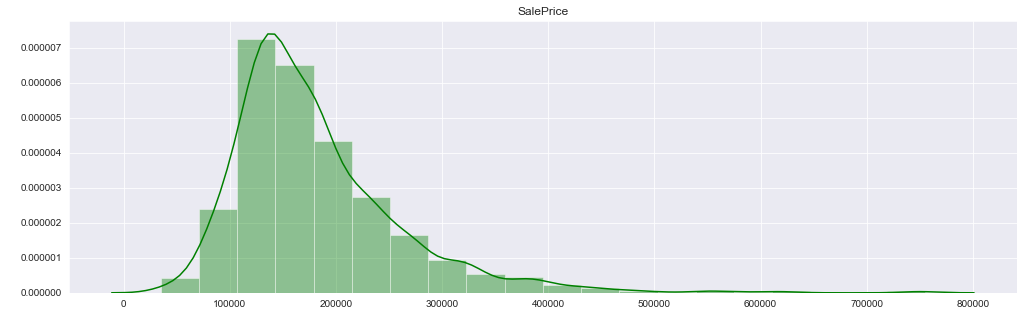

In [174]:
y_skewness=round(train.SalePrice.skew(),3)

plt.figure(figsize=(17, 5))
sns.distplot(train.SalePrice,bins=20, color='green')
plt.title('SalePrice')
plt.xlabel(" ")
plt.ylabel(" ")
print(color.BOLD + 'Skew is :',y_skewness , color.END)
plt.show()

The above histogram plot shows the distribution of the target variable `SalePrice` as being right-skewed. The distribution has a longer tail on the right. 

Therefore the distribution of SalePrice is positively skewed, meaning that the mass of the distribution is concentrated on the left of the figure.

Before moving any further, we will obtain a normal distribution by way of log-transformation.
We will use np.log() to transform `train.SalePrice` and calculate the skewness a second time, as well as re-plot the data.

A value closer to 0 means that we have improved the skewness of the data. 




Skew is : 0.122 


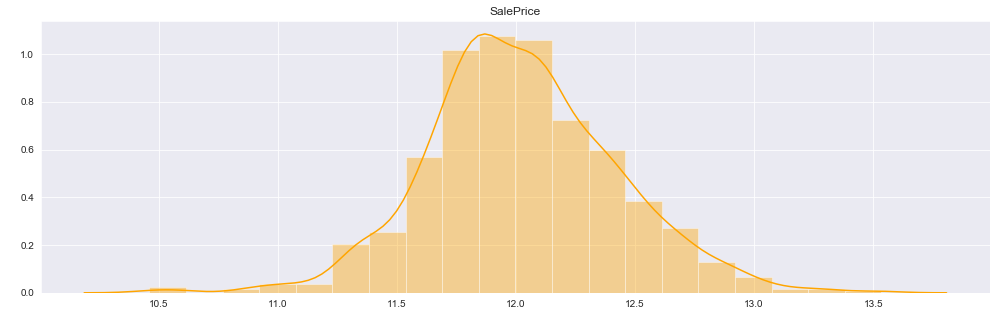

In [175]:
y = np.log(train.SalePrice)

plt.figure(figsize=(17, 5))
sns.distplot(y, bins=20, color='orange')
plt.title('SalePrice')
plt.xlabel(" ")
plt.ylabel(" ")
print(color.BOLD + 'Skew is :', round(y.skew(),3), color.END)
plt.show()

Now we can see visually that the data resembles a normal distribution.

Most importantly, the predictions generated by the final model will also be log-transformed, so we’ll need to convert these predictions back to their original form later.

Here, we used`np.log()` to transform the variable, and we will use `np.exp()` to reverse the transformation.

# Correlation Analysis
Now that we are aware of the structure of the dataset, let us take a closer look at the dataset to analyze the features. This brings us to the next step, correlation analysis.
Here we will explore the correlation between the features and the target by plotting a correlation matrix.

In [176]:
corr= train.corr()

In [177]:
corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011121,-0.021955,-0.037689,-0.030213,0.012925,-0.013463,-0.022694,-0.053184,-0.015012,...,-0.030262,-0.002115,0.003103,-0.046600,0.001491,0.048476,-0.006195,0.023511,0.000378,-0.021673
MSSubClass,0.011121,1.000000,-0.405399,-0.142033,0.032522,-0.059275,0.027757,0.040503,0.022785,-0.074434,...,-0.012681,-0.006659,-0.012002,-0.043813,-0.026004,0.008090,-0.007675,-0.013581,-0.021386,-0.084276
LotFrontage,-0.021955,-0.405399,1.000000,0.388580,0.235266,-0.056437,0.116552,0.081427,0.163938,0.146986,...,0.081603,0.116992,0.015230,0.074539,0.046278,0.116320,0.004992,0.026139,0.007813,0.370584
LotArea,-0.037689,-0.142033,0.388580,1.000000,0.091392,-0.002723,0.007462,0.007500,0.084529,0.175320,...,0.168621,0.061861,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.268179
OverallQual,-0.030213,0.032522,0.235266,0.091392,1.000000,-0.090442,0.571368,0.549827,0.403421,0.222467,...,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.795774


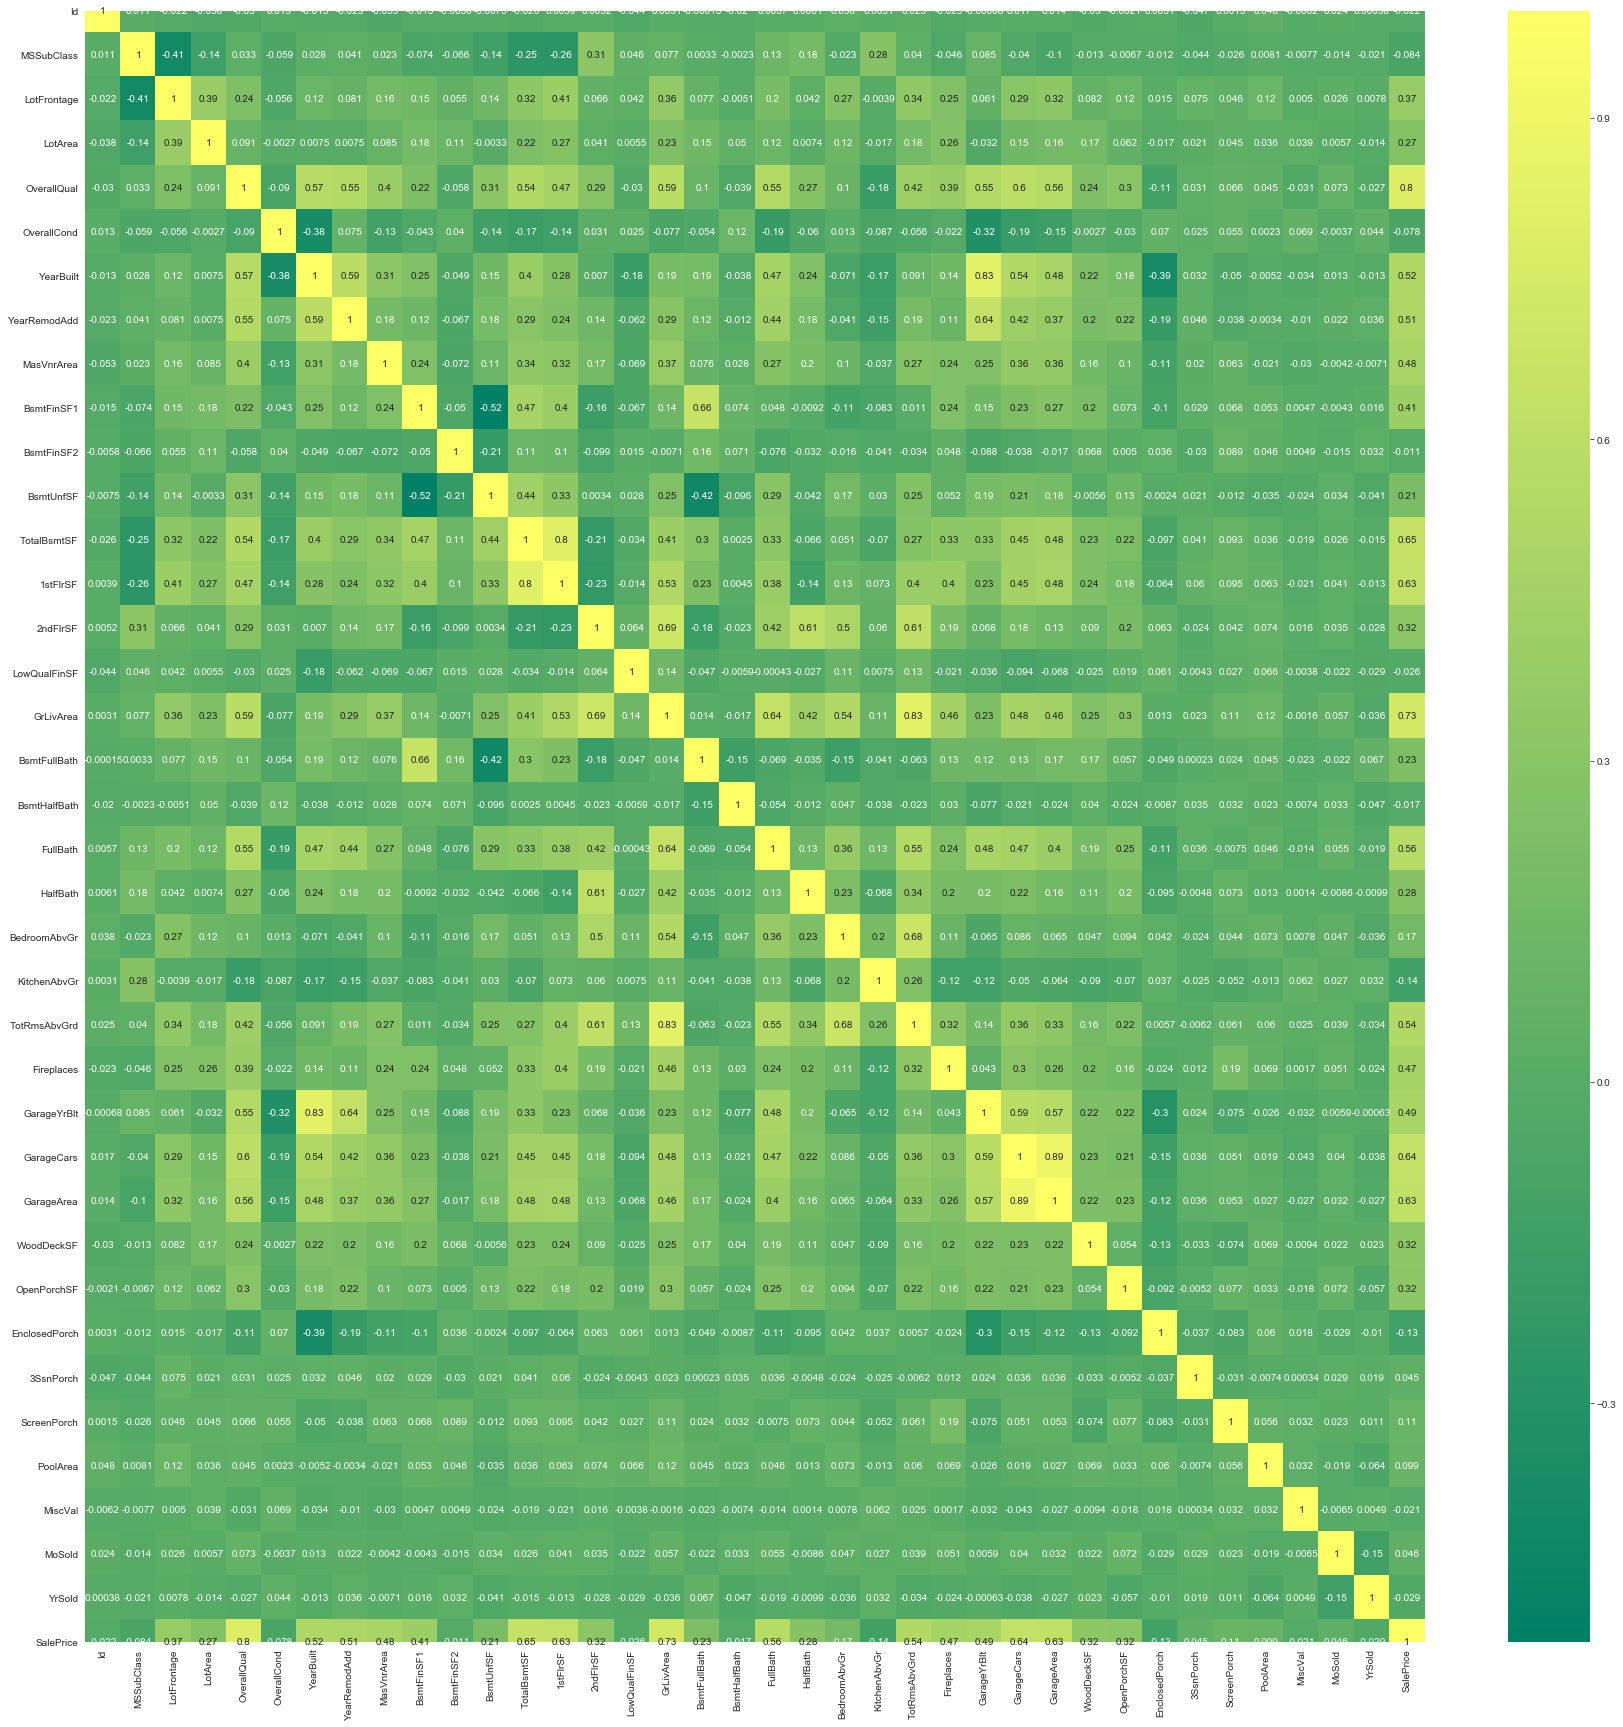

In [178]:
fig = plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap= 'summer')
plt.show()

**The colors and values are not very clear.Therefore, below is a better representation with features that are highly correlated with the SalePrice.**


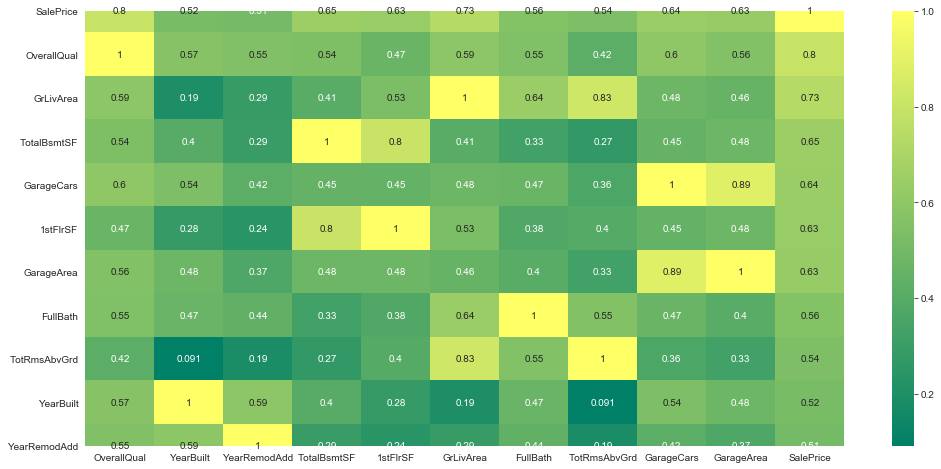

In [179]:
top_features= corr.index[corr['SalePrice'] > 0.5]
top_corr= train[top_features].corr().sort_values(by='SalePrice',ascending=False)

plt.subplots(figsize=(17,8))
sns.heatmap(top_corr,annot=True,cmap='summer')
plt.show()

From this we can tell that the following features are highly positively correlated with the SalePrice.
 - OverallQual - 0.79
 - GrLivArea - 0.71
 - GarageCars - 0.64
 - GarageArea - 0.62
 - TotalBsmtSF - 0.61
 - 1stFlrSF - 0.61
 
 
Here is a correlation guide, according to dummies.com:
- 0- No linear relationship
- +0.30- A weak uphill (positive) linear relationship
- +0.50- A moderate uphill (positive) relationship
- +0.70- A strong uphill (positive) linear relationship
- Exactly +1- A perfect uphill (positive) linear relationship

and vice versa.

https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/

GarageCars and GarageArea have strong correlation, TotalBsmtSF and 1stFlrSF have similarly high correlation. 
Therefore, we can assume that the number of cars stored in a garage strongly depends on the area of the garage.
On looking at the data homes with 0 GarageCars had 0 GarageArea indicating they don’t have a garage.

The two examples indicate that these features have strong correlation with each other, actually, the degree of correlation reaches the situation of multicollinearity, thus, we can assume that those features contain almost the same information.

#### Multicollinearity

And below we are going to look at multicollinearity.But what is multicollinearity?.

Well, according to statisticsbyjim.com, 'Multicollinearity occurs when independent variables in a regression model are correlated. 

This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. 

The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.'

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

In [180]:
multi_coll = train.corr().abs()

multi_coll_features = (multi_coll.where(np.triu(np.ones(multi_coll.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

multi_coll_features=pd.DataFrame(multi_coll_features[multi_coll_features >0.50],columns= ['Correlation'])

multi_coll_features

,,Correlation
GarageCars,GarageArea,0.887304
GrLivArea,TotRmsAbvGrd,0.829498
YearBuilt,GarageYrBlt,0.825317
TotalBsmtSF,1stFlrSF,0.803830
OverallQual,SalePrice,0.795774
GrLivArea,SalePrice,0.734968
2ndFlrSF,GrLivArea,0.694678
BedroomAbvGr,TotRmsAbvGrd,0.680390
BsmtFinSF1,BsmtFullBath,0.658507
TotalBsmtSF,SalePrice,0.651153


Multicollinearity will make it hard to interpret our coefficients, and it will also reduce the power of our model to identify independent variables that are statistically significant. These are definitely serious problems and to avoid them, we are going to drop the following features as they are highly correlated with other features within the dataset.

In [181]:
train.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'],axis = 1, inplace = True)
test.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'],axis = 1, inplace = True)

# Plots

#### **Below are some scatter plots to visualize some of the features relationship against the SalePrice.**

#### Box plot Overallqual/SalePrice

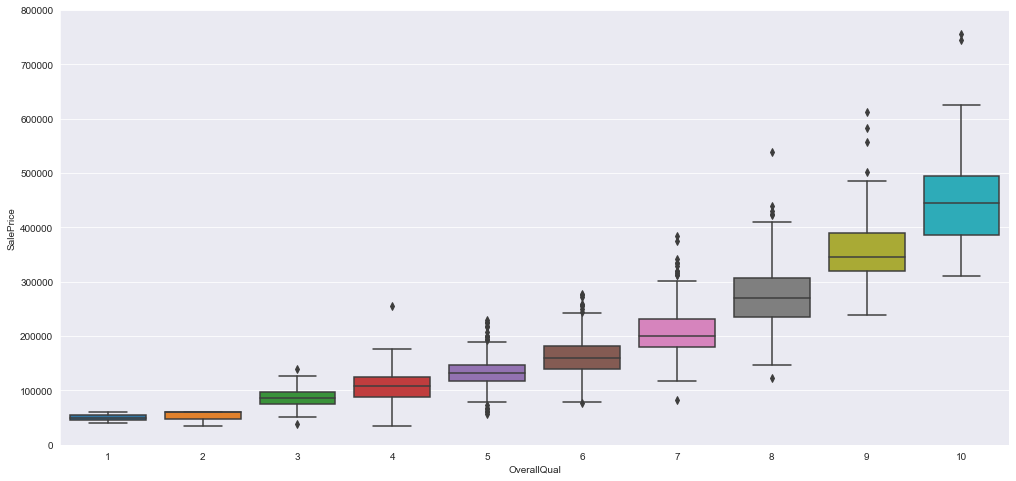

In [182]:
plt.subplots(figsize=(17,8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000)
plt.show()

The boxplot shows that as the OverallQual increases the SalePrices increases as well.

#### Scatter plot GarageCars/SalePrice

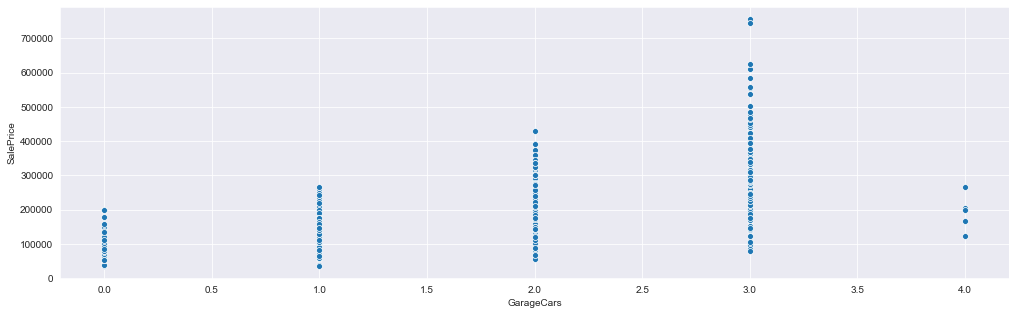

In [183]:
plt.figure(figsize=(17, 5))
sns.scatterplot(x=train['GarageCars'], y=train['SalePrice'])
plt.show()

#### Scatter plot TotalBsmtSF/SalePrice

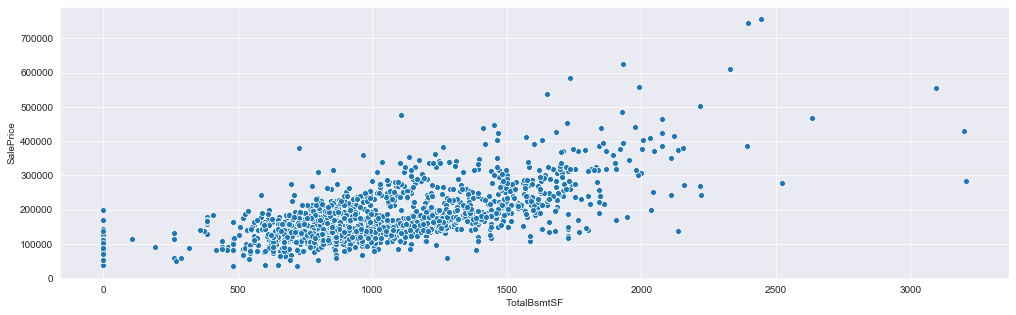

In [184]:
plt.figure(figsize=(17, 5))
sns.scatterplot(x=train['TotalBsmtSF'], y=train['SalePrice'])
plt.show()

#### Box plot YearBuilt/SalePrice

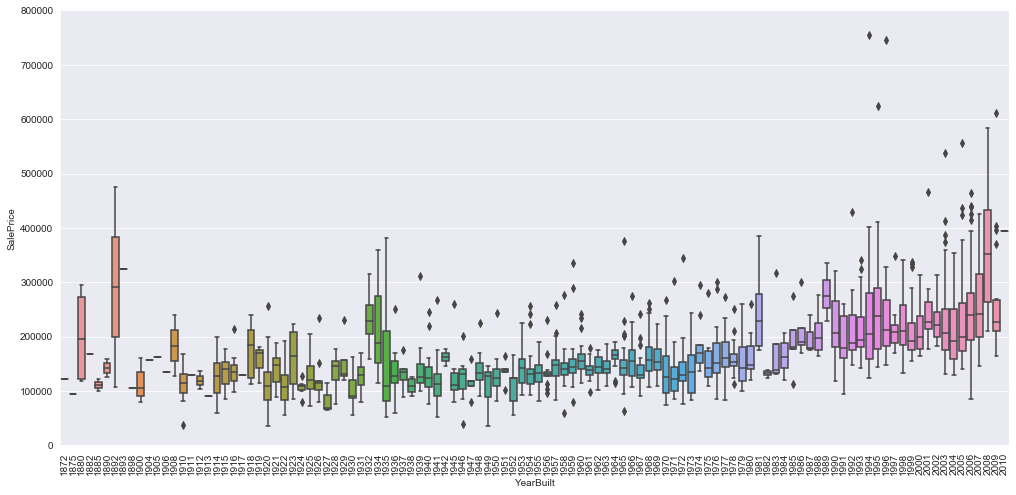

In [185]:
plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);
plt.show();


Although Yearblt and SalePrice do not show a strong following trends, this graph also indicates that, generally, the house price is higher while the built year is more recently.

#### Scatter plot LotArea/SalePrice

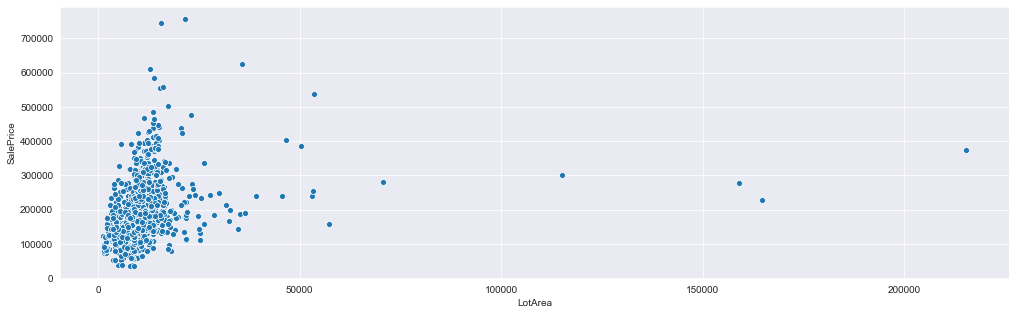

In [186]:
plt.figure(figsize=(17, 5))
sns.scatterplot(x=train['LotArea'], y=train['SalePrice'])
plt.show()

#### Scatter plot GrLivArea/SalePrice

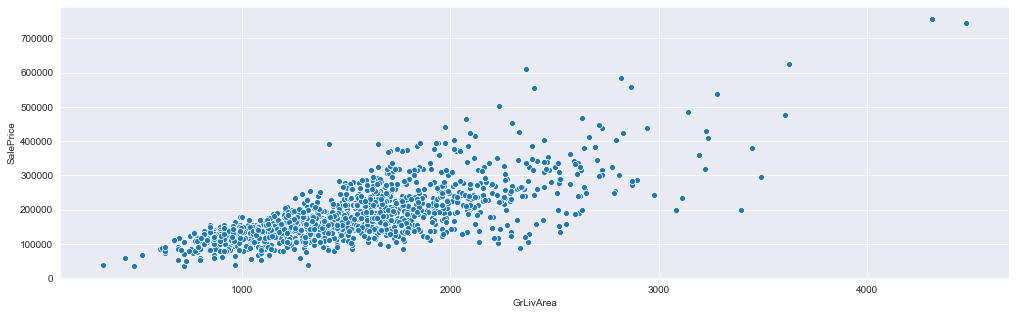

In [187]:
plt.figure(figsize=(17, 5))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

The above visuliasations show that there is indeed a strong correlation between the features and the SalePrice.

But, we have also noticed that the features contain outliers,and since we have removed the outliers for Ground Living Area('GrLivArea') already, as we make our models we will ensure that they are robust to outliers.

And note that the above for GrLivArea grapth shows that we nolonger have outliers above 5000. 

**Now that we’ve looked at the relationship between the features and the target variable, we are going to look at missing values in our datasets.**


# Missing data
Before we can prepare the data for modeling, we need to deal with the missing data.

To get a better understanding of missing values with the given data sets (train and test), we will determine the percentage of missing values and build bar plots.

#### Train- missing data

In [188]:
missing_train = train.isnull().sum() / len(train.index) * 100
missing_train = round(missing_train[missing_train > 0], 2)
missing_train.sort_values(ascending = False, inplace = True)
pd.DataFrame(missing_train, columns = ['Percentage'])

,Percentage
PoolQC,99.59
MiscFeature,96.30
Alley,93.76
Fence,80.73
FireplaceQu,47.33
LotFrontage,17.76
GarageYrBlt,5.56
GarageType,5.56
GarageFinish,5.56
GarageQual,5.56


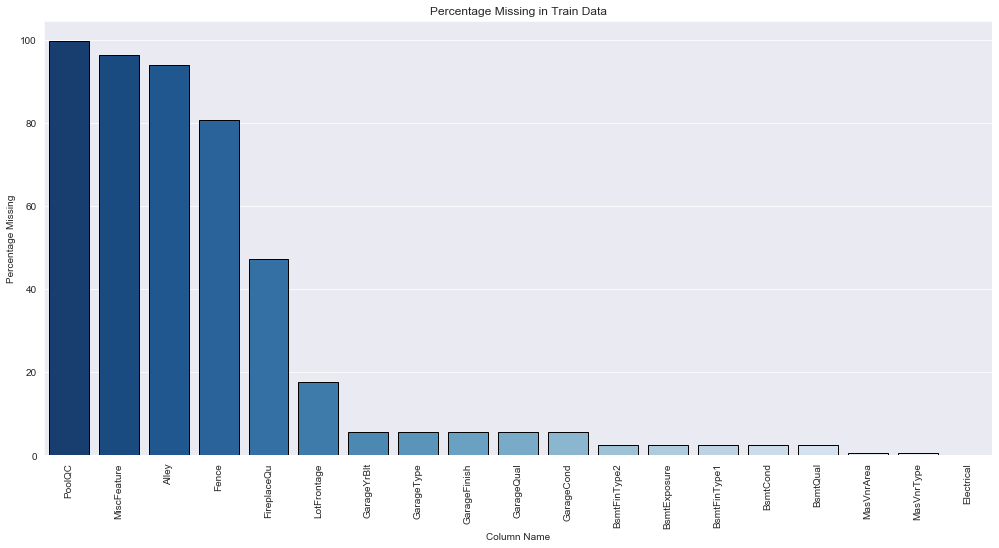

In [189]:
plt.subplots(figsize=(17, 8))
plt.xticks(rotation='90')
sns.barplot(x = missing_train.index, y = missing_train, palette = "Blues_r", ec = 'Black')
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Train Data")
plt.show()

In [190]:
len(missing_train)

19

#### Test- missing data

In [191]:
missing_test = test.isnull().sum() / len(test.index) * 100
missing_test = round(missing_test[missing_test > 0], 2)
missing_test.sort_values(ascending = False, inplace = True)
pd.DataFrame(missing_test, columns = ['Percentage'])

,Percentage
PoolQC,99.79
MiscFeature,96.50
Alley,92.67
Fence,80.12
FireplaceQu,50.03
LotFrontage,15.56
GarageCond,5.35
GarageQual,5.35
GarageFinish,5.35
GarageYrBlt,5.35


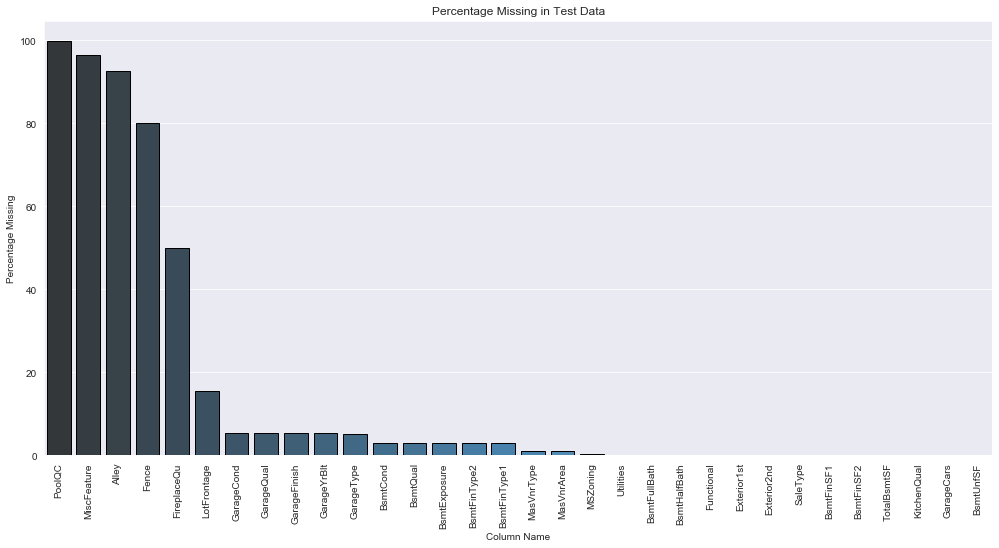

In [192]:
plt.subplots(figsize=(17, 8))
plt.xticks(rotation='90')
sns.barplot(x = missing_test.index, y = missing_test, palette = 'Blues_d', ec = 'Black')
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Test Data")
plt.show()

In [193]:
len(missing_test)

32

**In the train dataset, 19 out of 81 features have missing values.**

**And as for the test dataset, 32 out of 80 features have missing values.**

#### Total values missing and percentages

In [194]:
missing_values = pd.concat([train.isnull().sum(), train.isnull().sum() / train.shape[0], test.isnull().sum(), test.isnull().sum() / test.shape[0]], axis=1, keys=['Train', 'Percentage', 'Test', 'Percentage'])
missing_values = missing_values[missing_values.sum(axis=1) > 0].sort_values(by = 'Train', ascending = False)
missing_values['Percentage'] = round(missing_values['Percentage'] * 100, 2)
missing_values['Test'] = missing_values['Test'].astype(int)
missing_values

,Train,Percentage,Test,Percentage
PoolQC,1452,99.59,1456,99.79
MiscFeature,1404,96.30,1408,96.50
Alley,1367,93.76,1352,92.67
Fence,1177,80.73,1169,80.12
FireplaceQu,690,47.33,730,50.03
LotFrontage,259,17.76,227,15.56
GarageType,81,5.56,76,5.21
GarageQual,81,5.56,78,5.35
GarageFinish,81,5.56,78,5.35
GarageCond,81,5.56,78,5.35


We find that the following features suffer almost or more than 50% data missing;

* Alley: Type of alley access
* FireplaceQu: Fireplace quality
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories

Therefore, we will not delete these features even though it looks like they have more 50% information loss.
As in this case,looking at the data description, the NA’s in categorical variables actually mean “not present”. 

For example, NA in the ‘Alley’ variable means that the home has no alley.


**Joining datasets**
- To correct the issue, we will first join the train and test set. 

**Missing values**
- And then replace the Na’s with “None”. 
- And for the remaining numerical features, NA’s will be replaced by the value zero, median value of each of the columns and  mode values.

**Convert int features to str features**

Further more, we also realized that two of the numerical features (‘MSSubClass’, ‘Mosold’) were actually categorical.
- ‘MoSold’ used numerical values to represent months. For example, “1” meant January and “2” meant February. 
- In ‘MSSubClass’, numerical values identified the type of dwelling involved in the sale.

Therefore, we will convert both features into strings. 


 

# Feature Engineering

#### ID Column

To start,we are going to drop the ‘Id’ column in the data as it is not necessary for prediction process.

But firstly, we will save the ID columns as we will later need to use the Id column.

In [195]:
train_ID = train['Id']
test_ID = test['Id']

In [196]:
train.drop("Id",axis = 1, inplace = True)
test.drop("Id",axis = 1, inplace = True)

#### SalePrice column
We are going to drop the SalePrice column as well before joining the two datasets, as the test dataset doesnt have the `SalePrice column`.

In [197]:
train = train.drop('SalePrice', axis=1)

#### Joining the train and test datasets

In [198]:
train_num = len(train)
train_num

1458

In [199]:
test_num = len(test)
test_num

1459

In [200]:
joined_datasets = pd.concat(objs = [train, test], axis=0)

In [201]:
joined_datasets.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [202]:
joined_datasets.shape

(2917, 75)

In [203]:
joined_datasets_nan = (joined_datasets.isnull().sum() / len(joined_datasets)) * 100

In [204]:
joined_datasets_nan = joined_datasets_nan.drop(joined_datasets_nan[joined_datasets_nan == 0].index).sort_values(ascending = False)
missing_data_perc = pd.DataFrame({'Percentage':joined_datasets_nan})
missing_data_perc

,Percentage
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageCond,5.450806
GarageQual,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


In [205]:
len(missing_data_perc)

33

Now that we have combined the two datasets, we have a total of 33 columns with missing data.

And below we are going to look at how many missing values do we have for numeric features and categorical features

#### Missing values for numeric features

In [206]:
num_features = joined_datasets.select_dtypes(include=[np.number])

In [207]:
num = num_features.isnull().sum()
num = num[num > 0]
num

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
dtype: int64

In [208]:
len(num)

10

#### Missing values categorical features

In [209]:
cat_features = joined_datasets.select_dtypes(exclude = [np.number])

In [210]:
cat = cat_features.isnull().sum()
cat = cat[cat > 0]
cat

MSZoning           4
Alley           2719
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2908
Fence           2346
MiscFeature     2812
SaleType           1
dtype: int64

In [211]:
len(cat)

23

#### Imputing missing values
As we have mentioned above, we are going to be filling in missing values with 'None' for categorical columns,0,mode and median for numerical values. 

##### Fillna = 'None'

In [212]:
for cols in ("Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Fence","FireplaceQu",
            "GarageType","GarageFinish","GarageQual","GarageCond","Functional","MasVnrType","MiscFeature","PoolQC",'MSSubClass'):
    
    joined_datasets[cols] = joined_datasets[cols].fillna("None")

##### Fillna = 0

In [213]:
for cols in ("MiscVal","PoolArea",'TotalBsmtSF',"MiscVal","BsmtFinSF1","BsmtFinSF2", "BsmtHalfBath",
            "BsmtFullBath","BsmtUnfSF","MasVnrArea",'TotalBsmtSF',"GarageYrBlt","GarageCars"):
    
    joined_datasets[cols] = joined_datasets[cols].fillna(0)

##### Fillna = Mode

In [214]:
for cols in ('Electrical','KitchenQual','MSZoning', 'Exterior1st','Exterior2nd','SaleType'):
    
    joined_datasets[cols] = joined_datasets[cols].fillna(joined_datasets[cols].mode()[0])


##### Fillna = Median
Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

In [215]:
joined_datasets["LotFrontage"] = joined_datasets.groupby("Neighborhood")["LotFrontage"].transform(
    lambda LotF: LotF.fillna(LotF.median()))

##### Drop 
Dropping the Utilities column as it has the same value 'AllPub' for all records except 2NA and 1 'NoSeWa'

In [216]:
joined_datasets = joined_datasets.drop(['Utilities'], axis=1)

In [217]:
datasets_na = (joined_datasets.isnull().sum() / len(joined_datasets)) * 100
sum(datasets_na)

0.0

In [218]:
joined_datasets.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal


**Transforming required numerical features to categorical**

In [219]:
joined_datasets['MSSubClass'] = joined_datasets['MSSubClass'].apply(str)
joined_datasets['OverallCond'] = joined_datasets['OverallCond'].astype(str)
joined_datasets['YrSold'] = joined_datasets['YrSold'].astype(str)
joined_datasets['MoSold'] = joined_datasets['MoSold'].astype(str)

**Therefore, we nolonger have missing values in our dataset and we have transformed columns accordingly.**

# Encoding

### Encoding string to integer Values

In [220]:
cate_feats = joined_datasets.dtypes[joined_datasets.dtypes == "object"].index

In [221]:
cate_feats.shape

(46,)

##### Label Encoding some categorical variables for information in their ordering set

In [222]:
from sklearn.preprocessing import LabelEncoder

In [223]:
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in columns:
    label = LabelEncoder() 
    label.fit(list(joined_datasets[col].values)) 
    joined_datasets[col] = label.transform(list(joined_datasets[col].values))

In [224]:
joined_datasets.shape

(2917, 74)

And as for numerical features, for those columns that are highly skewed distribution which can lead to poor models. To combat this, these features were log transformed.

And for numerical features that have a highly skewed distribution can lead to poor models. Therefore,to combat this, these features will be log transformed as well.

### Computing the skewness of the numeric features

We will also log transform highly skewed features using np.log1p transformation which is a way to transform non-normal dependent variables into a normal shape. 

##### Log transform skewed numeric features

In [225]:
numeric_feats = joined_datasets.dtypes[joined_datasets.dtypes != "object"].index

In [226]:
skewed_var = joined_datasets[numeric_feats].apply(lambda x: skew(x.dropna()))

In [227]:
skewed_var

MSSubClass        0.139709
LotFrontage       1.103039
LotArea          13.109495
Street          -15.494756
Alley            -0.651705
LotShape         -0.618564
LandSlope         4.973254
OverallQual       0.189591
OverallCond       0.569314
YearBuilt        -0.599194
YearRemodAdd     -0.450134
MasVnrArea        2.621719
ExterQual        -1.800062
ExterCond        -2.496489
BsmtQual         -0.488362
BsmtCond         -2.861271
BsmtExposure     -1.117321
BsmtFinType1      0.083641
BsmtFinSF1        0.980645
BsmtFinType2     -3.042979
BsmtFinSF2        4.144503
BsmtUnfSF         0.919688
TotalBsmtSF       0.671751
HeatingQC         0.485534
CentralAir       -3.457555
LowQualFinSF     12.084539
GrLivArea         1.068750
BsmtFullBath      0.622415
BsmtHalfBath      3.929996
FullBath          0.165514
HalfBath          0.696666
BedroomAbvGr      0.326568
KitchenAbvGr      4.300550
KitchenQual      -1.449814
Functional       -3.817160
Fireplaces        0.725278
FireplaceQu       0.332611
G

In [228]:
len(skewed_var)

54

We have 54 skewed features to log transform.

Normality is an important assumption for many statistical techniques; In this case the data isn’t normal, applying `np.logp1` also increases the ability to run a broader number of tests.

In [229]:
top_skewed_var = skewed_var[abs(skewed_var) > 0.75]
top_skewed_var.sort_values(ascending=False)

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
LandSlope         4.973254
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
LotFrontage       1.103039
GrLivArea         1.068750
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
BsmtExposure     -1.117321
KitchenQual      -1.449814
ExterQual        -1.800062
Fence            -1.992649
ExterCond        -2.496489
BsmtCond         -2.861271
PavedDrive       -2.977741
BsmtFinType2     -3.042979
GarageQual       -3.072788
CentralAir       -3.457555
GarageCond       -3.594290
Functional       -3.817160
GarageYrBlt      -3.904632
Street          -15.494756
PoolQC          -21.217600
dtype: float64

In [230]:
len(top_skewed_var)

33

The 33 highly skewed features range from `+21` to `-21`. Below we will log transform this features accordingly 

### Log transformation of the 33 highly skewed features 

In [231]:
top_skewed_var = top_skewed_var.index
joined_datasets[top_skewed_var] = np.log1p(joined_datasets[top_skewed_var])

As seen above for numerical features, quite a few had a highly skewed distribution which can lead to poor models. 
And thats why we log transformed these features to avoid having a poor model at the end. 

Furthermore, since the data has many categorical variables, we will convert them into dummy/indicator variables.

## Getting dummy categorical features

In [232]:
joined_datasets = pd.get_dummies(joined_datasets)
print(joined_datasets.shape)

(2917, 215)


In [233]:
train = joined_datasets[:train_num]
test = joined_datasets[train_num:]

In [234]:
print(train.shape)
print(test.shape)

(1458, 215)
(1459, 215)


# Building Models

#### Importing libraries

In [235]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

#### Parameter setting

In [236]:
reg_line= LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
lasso = Lasso()
ENet = ElasticNet()
ridge = Ridge()

In [237]:
print('lm: ', reg_line.get_params().keys())
print('lasso: ', lasso.get_params().keys())
print('ridge: ', ridge.get_params().keys())
print('en: ', ENet.get_params().keys())
print('regre_tree: ', tree.get_params().keys())
print('forest: ', forest.get_params().keys())

lm:  dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])
lasso:  dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])
ridge:  dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])
en:  dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])
regre_tree:  dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])
forest:  dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_est

In [238]:
param_grid_tree = dict(max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                       min_samples_split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
                       min_samples_leaf = [0.1, 0.2, 0.3, 0.4, 0.5], 
                       max_features = list(range(1,train.shape[1])))
param_grid_forest = dict(n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200], 
                        max_depth = np.linspace(1, 32, 32, endpoint=True), 
                        min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True), 
                        min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True), 
                        max_features = list(range(1, train.shape[1])))
param_grid_lasso = dict(alpha = [0.0001, 0.00015, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1])
param_grid_ridge = dict(alpha = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000])#, max_iter=[100,110,120,130,140])
param_grid_en = dict(alpha = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000])
param_grid_forest = dict(n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200], 
                        max_depth = np.linspace(1, 32, 32, endpoint=True), 
                        min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True), 
                        min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True), 
                        max_features = list(range(1, train.shape[1])))
param_grid_gb = dict(learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01], n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000, 2000, 3000],
                    max_depth = np.linspace(1, 32, 32, endpoint=True), min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True),
                    min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True), max_features = list(range(1,train.shape[1])))

#### Validation function

In [239]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

The above function will be used to validate the RMSLE score of our models. This score will tell us if our model is good or bad.
By having a lower RSMSLE score , it would mean that we have a good model and a higher RSMSLE would mean that we have a bad model.

`n_folds= 5`,indicates the number of folds used to split the data. Here, we will used a value of 5. That means we will shuffle the data and then split the data into 5 groups.

#### Data split

In [240]:
X_train,X_test,y_train,y_test= train_test_split(train,y, test_size=0.2, shuffle=False)

# 1. Multiple Linear Regression

Multiple linear regression is the most common form of linear regression analysis.  As a predictive analysis, the multiple linear regression is used to explain the relationship between one continuous dependent variable and two or more independent variables.  The independent variables can be continuous or categorical (dummy coded as appropriate).

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$   
   
In this case, $Y$ is the reponse variable which depends on the $p$ predictor variables.

$\beta_0$ is the intercept. This can be interpreted as the value of $Y$ when all predictor variables are equal to zero.

$\beta_j$ is the average effect on $Y$ of a one unit increase in $X_j$.

https://www.statisticssolutions.com/what-is-multiple-linear-regression/

In [241]:
reg_line.fit(X_train,y_train)
print (reg_line.score(train, y))

0.9400636727733062


##### Y-intercept

In [242]:
a=reg_line.intercept_

In [243]:
a

-1.8150653412015068

##### Slope

In [244]:
b= pd.DataFrame(reg_line.coef_,train.columns,columns=['Coeffient'] )

In [245]:
b.sort_values(by='Coeffient',ascending=False).head(15)

,Coeffient
GarageType_None,3.045864
GarageYrBlt,0.468119
GrLivArea,0.424929
Condition2_PosA,0.210714
Foundation_Stone,0.185388
SaleCondition_AdjLand,0.142275
Neighborhood_StoneBr,0.134065
MiscFeature_Gar2,0.127780
MSZoning_RH,0.116756
Exterior1st_BrkFace,0.112290


#### Prediction y values

In [246]:
train_lm = reg_line.predict(X_train)
test_lm = reg_line.predict(X_test)

#### Visualisations

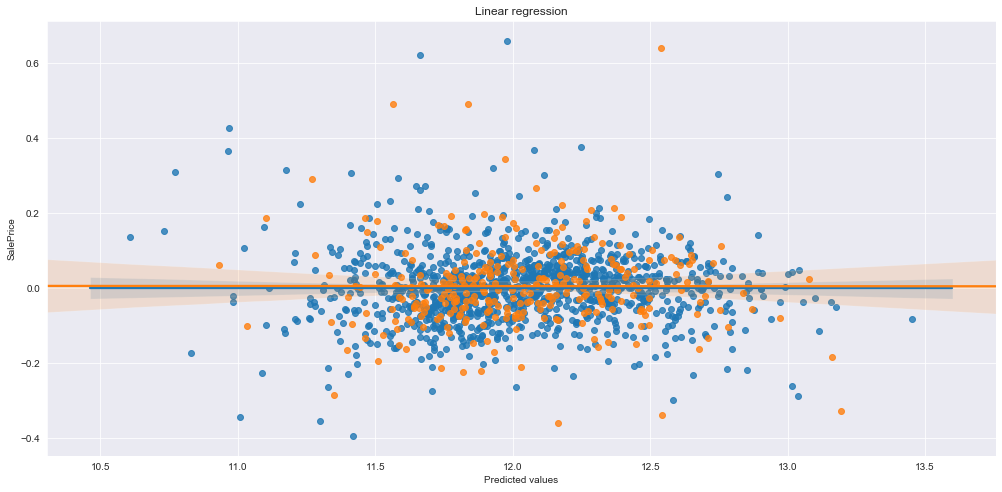

In [247]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
sns.regplot(train_lm, (train_lm - y_train))
sns.regplot(test_lm, (test_lm - y_test))
plt.show()

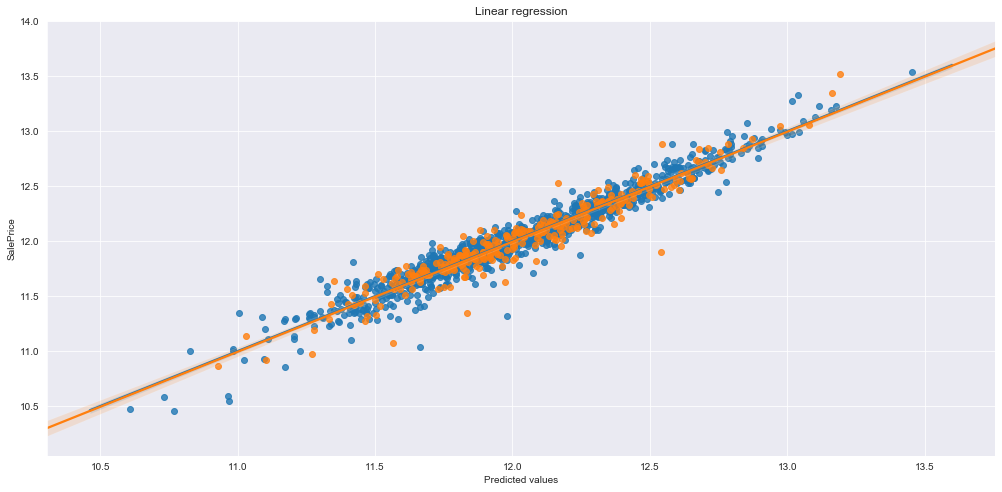

In [248]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
sns.regplot(train_lm, y_train)
sns.regplot(test_lm, y_test)
plt.show()

In [249]:
train_plot = y_train.append(pd.Series(y_test))

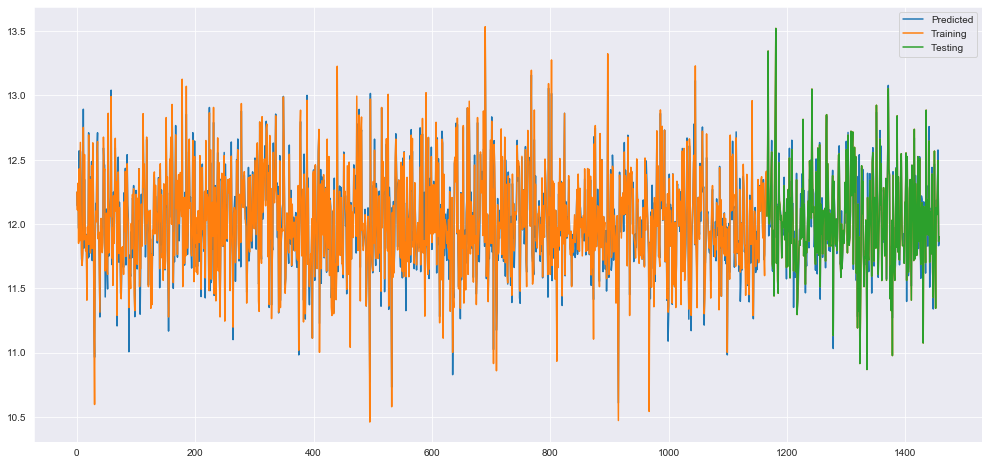

In [250]:
plt.subplots(figsize=(17, 8))
plt.plot(np.arange(len(y)), reg_line.predict(train), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()
plt.show()

In this model we have used all the features, and it performs very well. But it shows that we have overfitted the model.
Below, we are going to use another method called backward selection in which all of the x variables are included, then at each step, the variable that explains the least amount of y variability is removed, until the point at which removing an additional term would result in a significant decrease in the amount of variance explained by the model.

#### Using backward selection

In [251]:
import statsmodels.api as sm
def backwardElimination(x,t, Y, sl, columns):
    print(Y.isnull().sum().sum())
    print(x.shape)
    #x= np.append(arr = np.ones((len(x),1)),values = x,axis = 1)
    x_c = pd.DataFrame(data = np.ones((len(x),1)),index = x.index,columns = ['constant'])
    print(x_c.shape)
    columns.append('constant')
    x = x.join(x_c)
    #x = pd.merge(x_c,x,how = 'inner',left_index = True,right_index = True)
    #print(x.tail())
    ini = len(columns)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor = sm.OLS(Y,x).fit()
        #print( sm.OLS(Y,x).fit())
        maxVar = max(regressor.pvalues) #.astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor.pvalues[j].astype(float) == maxVar):
                    del columns[j]
                    x = x.loc[:, columns]
                    #t = t.loc[:,columns]
    return x

In [252]:
SL = 0.05
col_r = backwardElimination(train.copy(),test.copy() ,y, SL, train.columns.tolist()).columns

0
(1458, 215)
(1458, 1)


In [253]:
len(col_r)

71

In [254]:
trainL = train[col_r]
testL = test[col_r]

In [255]:
X_trainlm, X_testlm, y_trainlm, y_testlm = train_test_split(trainL, y, test_size=0.2, shuffle=False)

In [256]:
reg_line.fit(X_trainlm, y_trainlm)
print (reg_line.score(X_trainlm, y_trainlm))

0.9400164046059496


#### Y-intercept

In [257]:
bw_a=reg_line.intercept_

In [258]:
bw_a

1.0101664782750852

#### Slope

In [259]:
bw_b= pd.DataFrame(reg_line.coef_,trainL.columns,columns=['Coeffient'] )

In [260]:
bw_b.sort_values(by='Coeffient',ascending=False).head(15)

,Coeffient
GarageType_None,1.828192
GrLivArea,0.416165
Condition2_PosA,0.267154
GarageYrBlt,0.242517
RoofMatl_WdShngl,0.151446
Foundation_Stone,0.147854
Neighborhood_StoneBr,0.144406
Exterior1st_BrkFace,0.102487
LotArea,0.101162
Neighborhood_NoRidge,0.092069


#### Prediction y values

In [261]:
train_bw = reg_line.predict(X_trainlm)
test_bw = reg_line.predict(X_testlm)

#### Visualisation

In [262]:
train_plot = y_train.append(pd.Series(y_testlm))

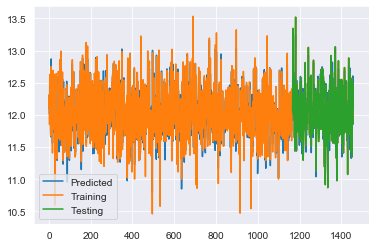

In [263]:
plt.plot(np.arange(len(y)), reg_line.predict(trainL), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_testlm))+len(y_trainlm), y_testlm, label='Testing')
plt.legend()
plt.show()

As we can from this method, 71 features were used, but the model is still overfitted.
The score didnt improve from the first model above, but the slope and y_int changed.

Therefore, below we will use other regression models which will ensure that our model doesnt result in overfitting.

#### Saving the file to csv.
We will markdown the below code as it is for saving the results from the above models

reg_line1 = np.round(np.exp(reg_line.predict(testL)))
pd.DataFrame({'Id': test_ID, 'SalePrice': reg_line1}).to_csv('Linear.csv', index = False)

reg_line2 = np.round(np.exp(reg_line.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': reg_line2}).to_csv('Linear.csv', index = False)

# 2. Decision Tree

In [264]:
random_tree = RandomizedSearchCV(estimator = tree, param_distributions = param_grid_tree, n_iter = 100, random_state = 0)

start_time = time.time()
random_result = random_tree.fit(train, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.660983 using {'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'max_features': 117, 'max_depth': 5}
Execution time: 3.8567986488342285 ms


In [265]:
tree = DecisionTreeRegressor(min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 117, max_depth = 5.0)
tree.fit(X_train, y_train)
print (tree.score(train, y))
score = rmsle_cv(tree)
print("Tree score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

0.6947003665124962
Tree score: 0.2344 (0.0039)



#### Predicting y values

In [266]:
train_dt = tree.predict(X_train)
test_dt = tree.predict(X_test)

#### Visualisations

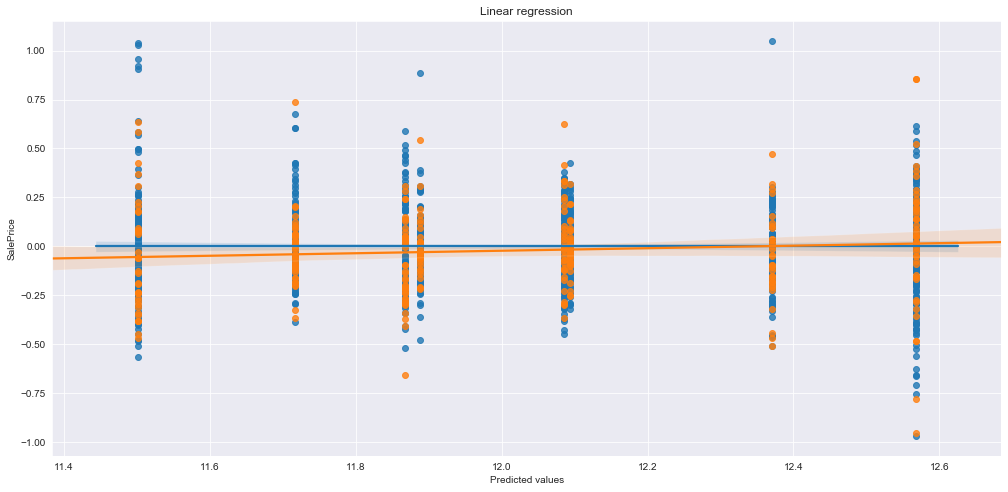

In [267]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
sns.regplot(train_dt, (train_dt - y_train))
sns.regplot(test_dt, (test_dt - y_test))
plt.show()

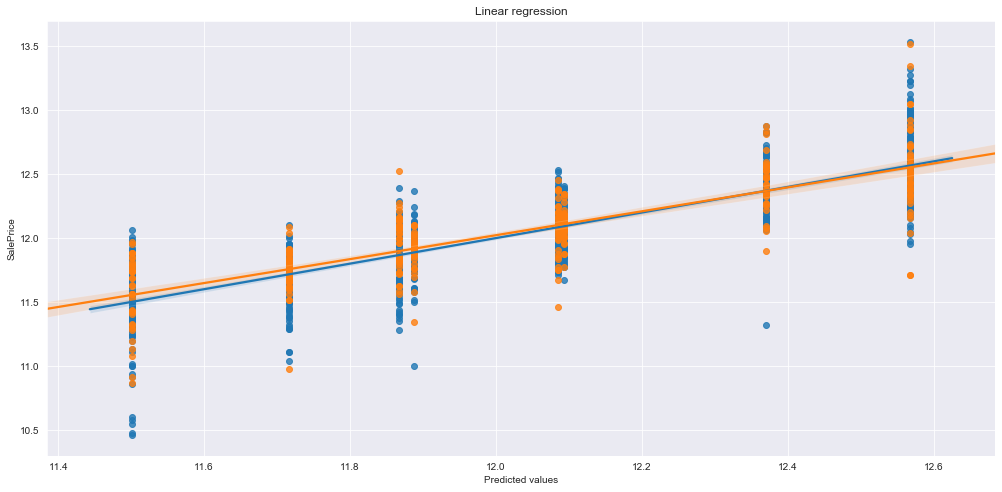

In [268]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
sns.regplot(train_dt, y_train)
sns.regplot(test_dt, y_test)
plt.show()

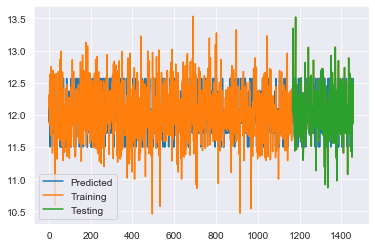

In [269]:
train_plot1 = y_train.append(pd.Series(y_test))
plt.plot(np.arange(len(y)), tree.predict(train), label='Predicted')
plt.plot(np.arange(len(train_plot1)), train_plot1, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()
plt.show()

### Decision Tree- Selected Features using feature_importance

In [270]:
result=train
result1= pd.DataFrame(tree.feature_importances_, result.columns)
result1.columns = ['Feature']
result1.sort_values(by='Feature',ascending=False).head()

,Feature
OverallQual,0.658283
GrLivArea,0.198020
TotalBsmtSF,0.119805
BsmtFinSF1,0.023891
MSSubClass,0.000000


In [271]:
features_coeff = pd.Series(tree.feature_importances_, index = train.columns)

In [272]:
used_features_tree= features_coeff[features_coeff != 0]
used_features_tree.sort_values(ascending=False)

OverallQual    0.658283
GrLivArea      0.198020
TotalBsmtSF    0.119805
BsmtFinSF1     0.023891
dtype: float64

In [273]:
len(used_features_tree)

4

In [274]:
not_used_features_tree= features_coeff[features_coeff==0]

In [275]:
len(not_used_features_tree)

211

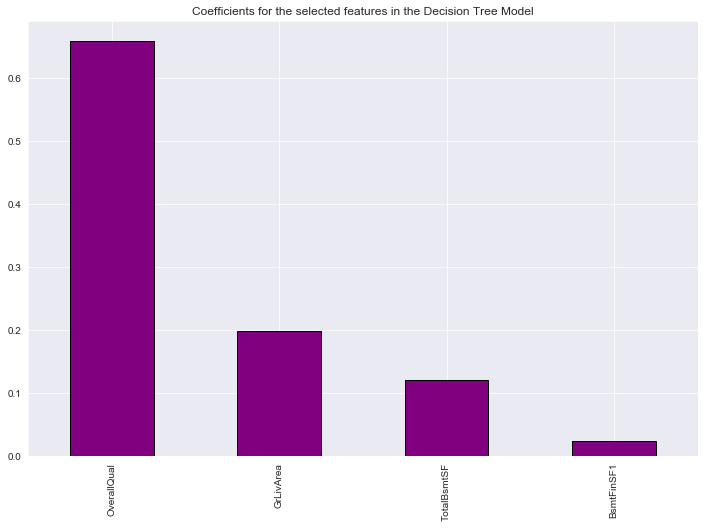

In [276]:
used_features_tree.sort_values(ascending=False).plot(kind = "bar",figsize =(12,8), color = "purple", ec='black')
plt.title("Coefficients for the selected features in the Decision Tree Model")
plt.show()

**Decision Tree selected 30 features and eliminated the other 185 features**

And it performance good as it has a score of 0.87 , which is not bad at all.
But we will look continue building other models using other methods so that we will be able to compare the models and select the best one.

# 3.Random Forest 

In [277]:
random_forest = RandomizedSearchCV(estimator = forest, param_distributions = param_grid_forest, n_iter = 100, random_state = 0)

start_time = time.time()
random_result = random_forest.fit(train, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.689354 using {'n_estimators': 64, 'min_samples_split': 0.2, 'min_samples_leaf': 0.1, 'max_features': 48, 'max_depth': 30.0}
Execution time: 42.129804611206055 ms


In [278]:
forest = RandomForestRegressor(n_estimators = 64, min_samples_split = 0.2, min_samples_leaf = 0.1, max_features = 48, max_depth = 30.0)
forest.fit(X_train, y_train)
print (forest.score(train, y))
score = rmsle_cv(forest)
print("Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

0.6949034056187838
Forest score: 0.2248 (0.0106)



#### Predicting y values

In [279]:
train_fo = forest.predict(X_train)
test_fo = forest.predict(X_test)

#### Visualisations

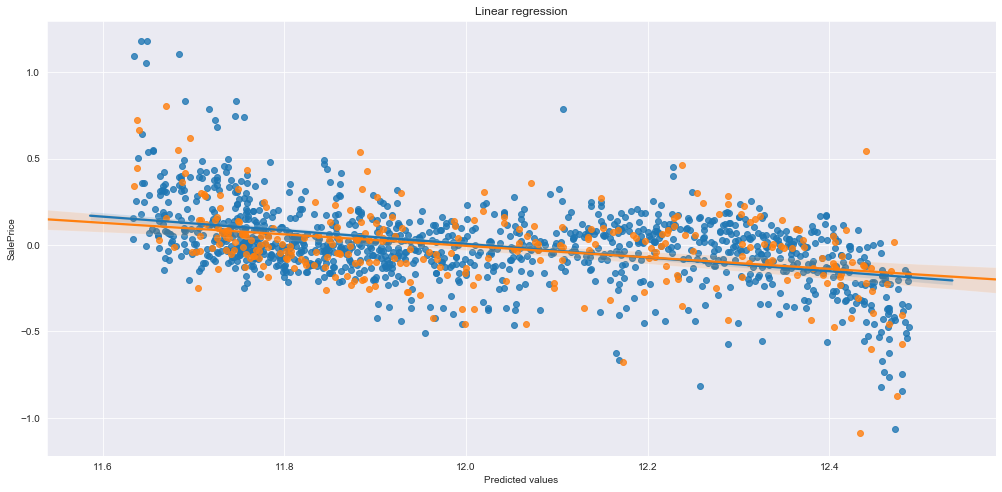

In [280]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
sns.regplot(train_fo, (train_fo - y_train))
sns.regplot(test_fo, (test_fo - y_test))
plt.show()

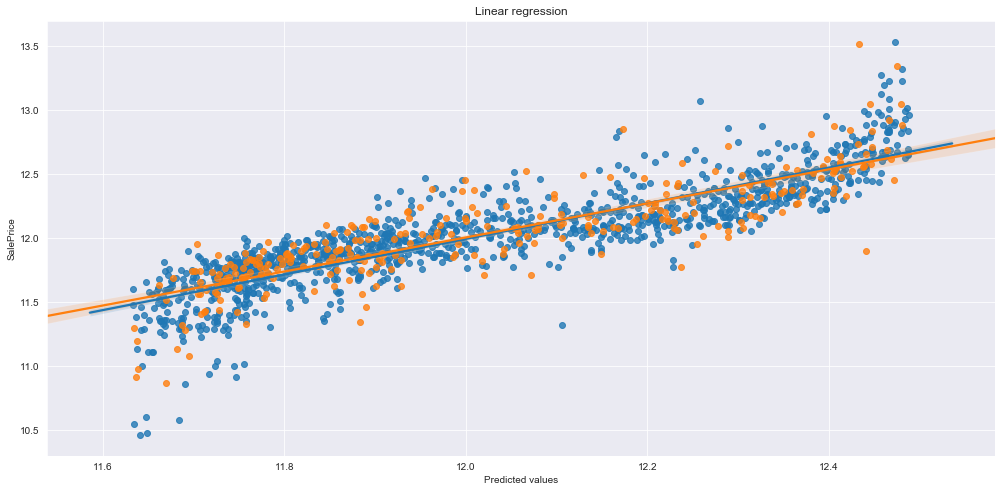

In [281]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
sns.regplot(train_fo, y_train)
sns.regplot(test_fo, y_test)
plt.show()

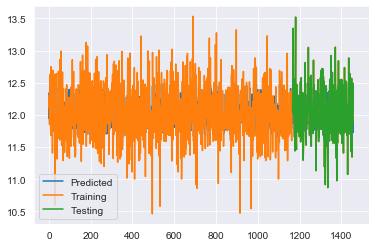

In [282]:
train_plot2 = y_train.append(pd.Series(y_test))
plt.plot(np.arange(len(y)), forest.predict(train), label='Predicted')
plt.plot(np.arange(len(train_plot2)), train_plot2, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()
plt.show()

### Random Forest- Selected Features using feature_importance

In [283]:
result1=train
result2= pd.DataFrame(forest.feature_importances_, result1.columns)
result2.columns = ['Feature']
result2.sort_values(by='Feature',ascending=False).head()

,Feature
OverallQual,0.254947
YearBuilt,0.162380
GrLivArea,0.151526
ExterQual,0.069988
FullBath,0.042980


In [284]:
features_coeff1 = pd.Series(forest.feature_importances_, index = train.columns)
used_features_forest= features_coeff1[features_coeff1 != 0]
used_features_forest.sort_values(ascending=False)

OverallQual          0.254947
YearBuilt            0.162380
GrLivArea            0.151526
ExterQual            0.069988
FullBath             0.042980
TotalBsmtSF          0.039734
GarageYrBlt          0.039578
GarageCars           0.037931
KitchenQual          0.030387
YearRemodAdd         0.022645
BsmtQual             0.019559
Foundation_PConc     0.019169
Fireplaces           0.018599
LotFrontage          0.017599
LotArea              0.014789
MasVnrArea           0.012808
GarageType_Attchd    0.008152
GarageFinish         0.006916
FireplaceQu          0.006407
BsmtFinSF1           0.005884
BsmtFullBath         0.003579
OpenPorchSF          0.003572
BsmtFinType1         0.003055
HalfBath             0.002665
MSSubClass           0.002211
WoodDeckSF           0.001419
HeatingQC            0.001007
LotShape             0.000304
HouseStyle_1Story    0.000209
dtype: float64

In [285]:
len(used_features_forest)

29

In [286]:
not_used_features_forest= features_coeff1[features_coeff1==0]
len(not_used_features_forest)

186

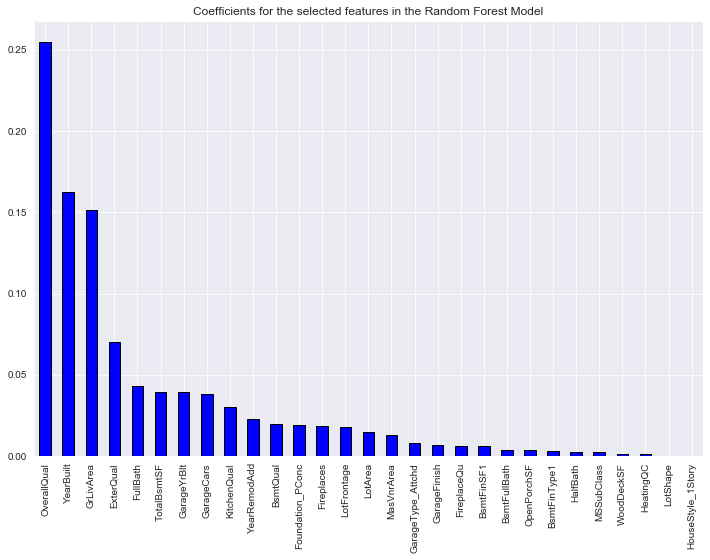

In [287]:
used_features_forest.sort_values(ascending=False).plot(kind = "bar",figsize =(12,8), color = "blue", ec='black')
plt.title("Coefficients for the selected features in the Random Forest Model")
plt.show()

**Random Forest selected 18 features and eliminated the other 197 features**

#### Saving file to csv

random1 = np.round(np.exp(forest.predict(test)))
#pd.DataFrame({'Id': test_ID, 'SalePrice': random}).to_csv('RandomForest.csv', index = False)

# 4.Lasso

Lasso is capable of dropping predictors entirely.   

A lasso model is fit under the constraint of minimizing the following equation:   
$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j|$$   

$$RSS + \alpha\sum_{j=1}^p|b_j|$$

In lasso, the penalty parameter is applied to the sum of the absolute values of the coefficients.   

The advantage of lasso is that it performs subset selection in addition to shrinkage.

The lasso regressor works by training on columns that are relevant to the dataset and does not include data from columns that are not needed.

In [288]:
random_lasso = RandomizedSearchCV(estimator = lasso, param_distributions = param_grid_lasso, n_iter = 100, random_state = 0)

start_time = time.time()
random_result = random_lasso.fit(train, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.922446 using {'alpha': 0.0004}
Execution time: 1.6440563201904297 ms


In [289]:
lasso = Lasso(alpha=0.0004)
lasso.fit(train, y)
print (lasso.score(train, y))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

0.9367032312069467
Lasso score: 0.1110 (0.0070)



#### Predicting y values

In [290]:
train_la = lasso.predict(X_train)
test_la = lasso.predict(X_test)

#### Visualisation

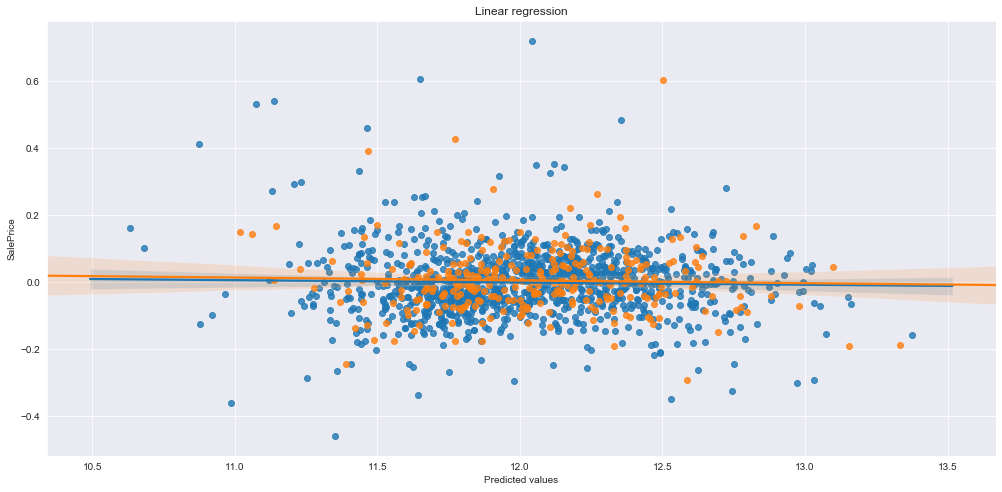

In [291]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
sns.regplot(train_la, (train_la - y_train))
sns.regplot(test_la, (test_la - y_test))
plt.show()

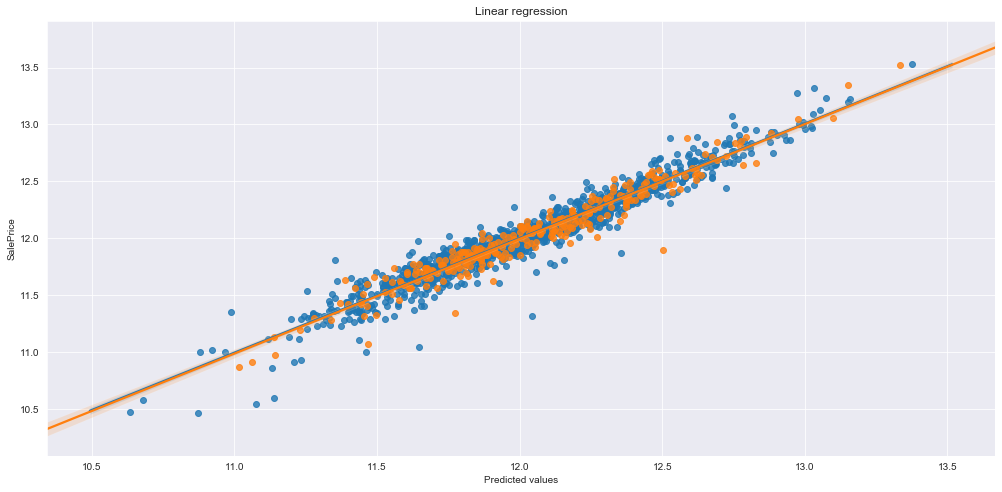

In [292]:

plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
sns.regplot(train_la, y_train)
sns.regplot(test_la, y_test)
plt.show()

### Lasso- Selected Features using feature_importance

In [293]:
result3=train
result4= pd.DataFrame(lasso.coef_, result3.columns)
result4.columns = ['Feature']
result4.sort_values(by='Feature',ascending=False).head()

,Feature
GrLivArea,0.391130
Neighborhood_Crawfor,0.096454
LotArea,0.088554
Neighborhood_StoneBr,0.086709
Functional,0.063679


In [294]:
features_coeff2 = pd.Series(lasso.coef_, index = train.columns)
used_features_lasso= features_coeff2[features_coeff2 != 0]
used_features_lasso.sort_values(ascending=False)
len(used_features_lasso)

104

In [295]:
not_used_features_lasso= features_coeff2[features_coeff2==0]
len(not_used_features_lasso)

111

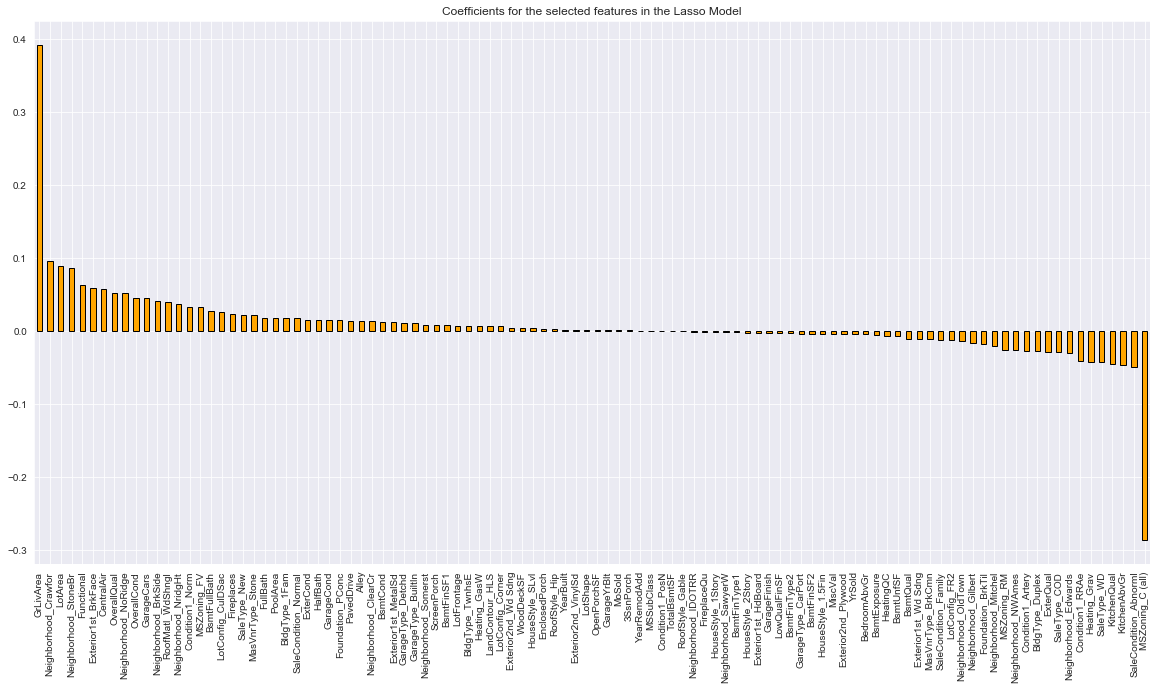

In [296]:
used_features_lasso.sort_values(ascending=False).plot(kind = "bar",figsize =(20,10), color = "orange", ec='black')
plt.title("Coefficients for the selected features in the Lasso Model")
plt.show()

**Lasso selected 104 features and eliminated the other 111 features**

#### Saving file to csv

Lasso1 = np.round(np.exp(lasso.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': Lasso1}).to_csv('Lasso2.csv', index = False)

# 5.ENet

Elastic net is basically a combination of both L1 and L2 regularization.So it uses both L1 and L2 penality term

It takes correlated independent variables in a dataset, and then it simply form a group consisting of these correlated variables. Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.

In [297]:
random_en = RandomizedSearchCV(estimator = ENet, param_distributions = param_grid_en, n_iter = 100, random_state = 0)

start_time = time.time()
random_result = random_en.fit(train, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.922145 using {'alpha': 0.001}
Execution time: 1.162329912185669 ms


In [298]:
ENet = ElasticNet(alpha = 0.001)
ENet.fit(train, y)
print(ENet.score(train, y))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

0.9348916058999086
ElasticNet score: 0.1112 (0.0070)



#### Predicting y values 

In [299]:
train_en = ENet.predict(X_train)
test_en = ENet.predict(X_test)

#### Visualisation

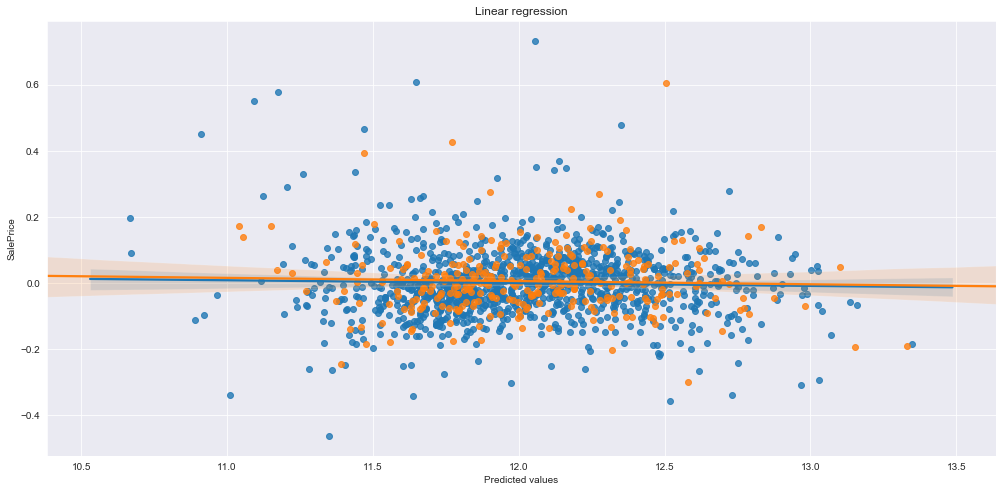

In [300]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
sns.regplot(train_en, (train_en - y_train))
sns.regplot(test_en, (test_en - y_test))
plt.show()

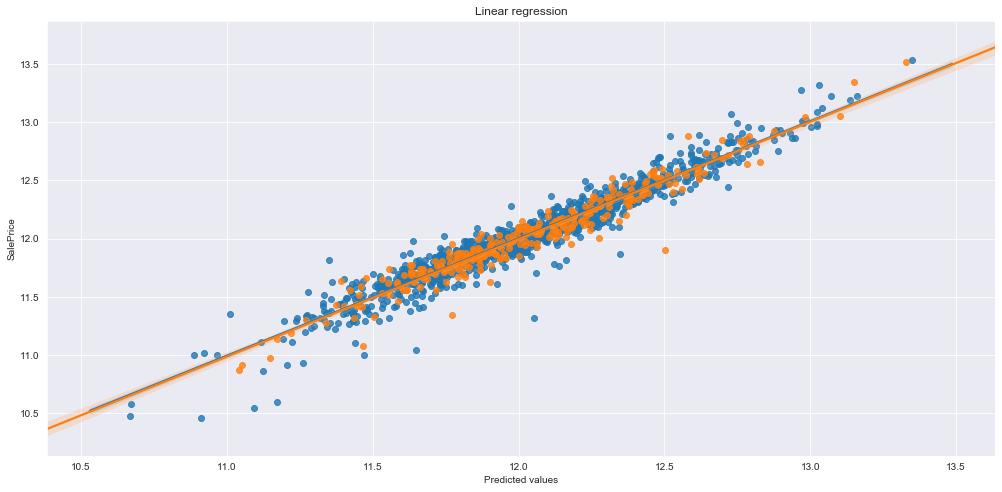

In [301]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
sns.regplot(train_en, y_train)
sns.regplot(test_en, y_test)
plt.show()

### Enet- Selected Features using feature_importance

In [302]:
result_enet=train
result_EN= pd.DataFrame(ENet.coef_, result_enet.columns)
result_EN.columns = ['Feature']
result_EN.sort_values(by='Feature',ascending=False).head()

,Feature
GrLivArea,0.375304
Neighborhood_Crawfor,0.091384
LotArea,0.088796
Neighborhood_StoneBr,0.076482
Functional,0.059129


In [303]:
features_coeff_en = pd.Series(ENet.coef_, index = train.columns)
used_features_Enet= features_coeff_en[features_coeff_en != 0]
used_features_Enet.sort_values(ascending=False)
len(used_features_Enet)

96

In [304]:
not_used_features_Enet= features_coeff_en[features_coeff_en==0]
len(not_used_features_Enet)

119

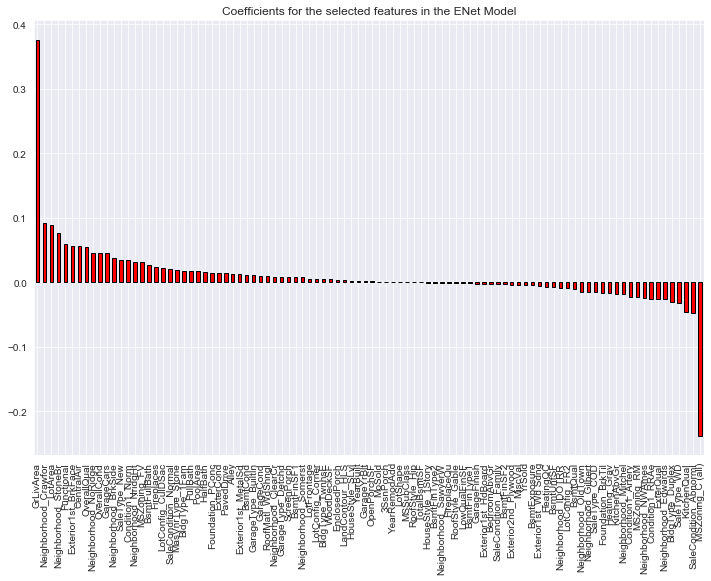

In [305]:
used_features_Enet.sort_values(ascending=False).plot(kind = "bar",figsize =(12,8), color = "red", ec='black')
plt.title("Coefficients for the selected features in the ENet Model")
plt.show()

**ENet selected 96 features and eliminated the other 119 features**

#### Saving file to csv

ENet1 = np.round(np.exp(ENet.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': ENet1}).to_csv('ENet.csv', index = False)

## Ridge
Now let us train our models on a Ridge regressor from sklearn.linear_model package. 
Ridge regularization(L1) has a parameter alpha which is used to tune the data to fit the model to the training or validation data. 

In [306]:
random_ridge = RandomizedSearchCV(estimator = ridge, param_distributions = param_grid_ridge, cv = 3, n_iter = 100, random_state = 0)
start_time = time.time()
random_result = random_ridge.fit(train, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.917166 using {'alpha': 10}
Execution time: 0.41376161575317383 ms


In [307]:
ridge = Ridge(alpha=10)
ridge.fit(train, y)
print (ridge.score(train, y))
score = rmsle_cv(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

0.9376262531223408
Ridge score: 0.1138 (0.0074)



#### Predicting y values

In [308]:
train_ridge = ridge.predict(X_train)
test_ridge = ridge.predict(X_test)

#### Visualisations

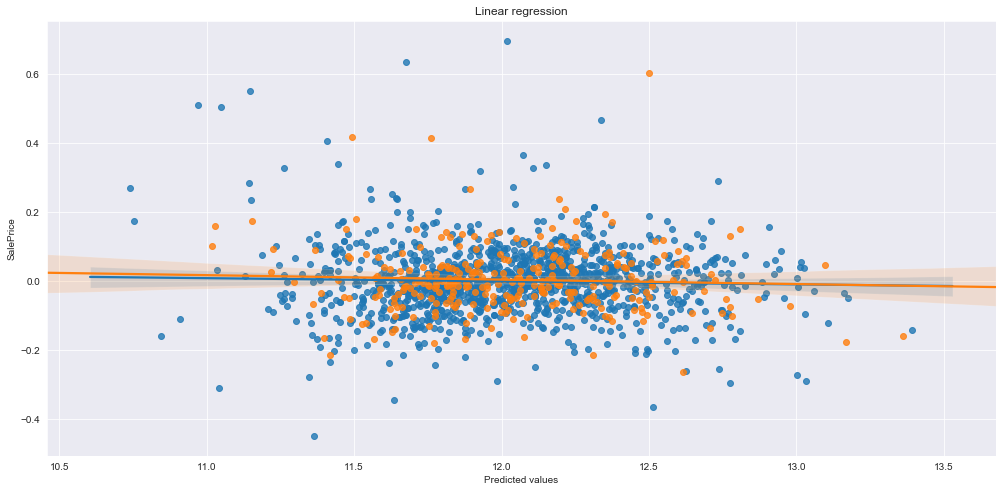

In [309]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
sns.regplot(train_ridge, (train_ridge - y_train))
sns.regplot(test_ridge, (test_ridge - y_test))
plt.show()

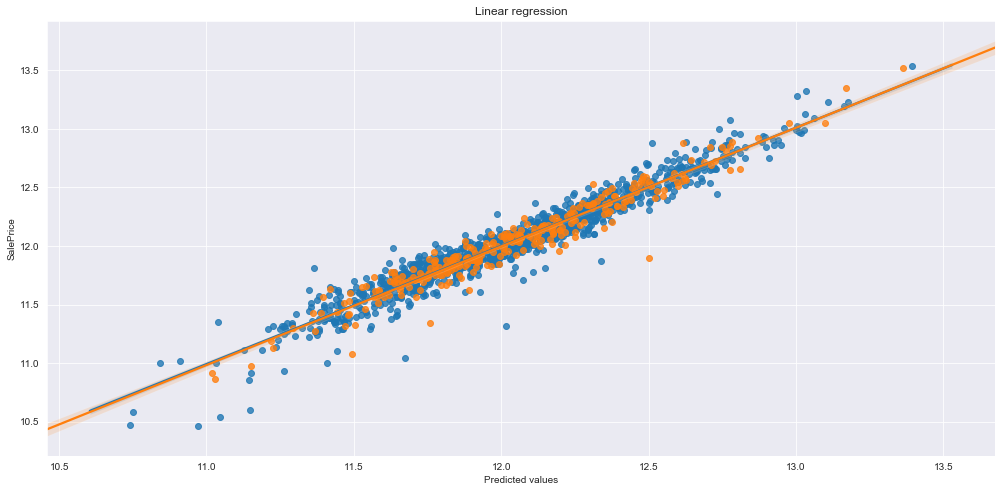

In [310]:
plt.subplots(figsize=(17, 8))
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
sns.regplot(train_ridge, y_train)
sns.regplot(test_ridge, y_test)
plt.show()

### Ridge- Selected Features using feature_importance

In [311]:
rid=train
rid1= pd.DataFrame(ridge.coef_, rid.columns)
rid1.columns = ['Feature']
rid1.sort_values(by='Feature',ascending=False).head()

,Feature
GrLivArea,0.274820
LotArea,0.094135
Neighborhood_Crawfor,0.084166
Neighborhood_StoneBr,0.075587
CentralAir,0.064686


In [312]:
features_coeff_rid= pd.Series(ridge.coef_, index = train.columns)
used_features_ridge= features_coeff_rid[features_coeff_rid != 0]
used_features_ridge.sort_values(ascending=False)
len(used_features_ridge)

215

In [313]:
not_used_features_ridge=features_coeff_rid[features_coeff_rid==0]
len(not_used_features_ridge)

0

**Ridge used all 215 features**

#### Saving file to csv

ridge1 = np.round(np.exp(ridge.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': ridge1}).to_csv('ridge1.csv', index = False)

# SIMPLE AVERAGE
As we have seen, most of the models built above perform very well, and hence we are averaging the performance of the best 3 models to see how they will perform when averaged.

#### Save file to csv

simple_avg5 = np.round((ridge1 + Lasso1 + ENet1)/3)
pd.DataFrame({'Id': test_ID, 'SalePrice': simple_avg5}).to_csv('simple_avg5.csv', index = False)

# Results

In [314]:
Result_train_dict = {'Linear' : {'Train Variance' : metrics.explained_variance_score(y_trainlm, train_lm), 
                               'Train r2' : metrics.r2_score(y_trainlm, train_lm),
                               'Train MAE': metrics.mean_absolute_error(y_trainlm, train_lm),
                               'Train MSE': metrics.mean_squared_error(y_trainlm, train_lm),
                               'Train RMSE' : np.sqrt(metrics.mean_squared_error(y_trainlm, train_lm)),
                               'Train RMSLE' : rmsle_cv(reg_line).mean()}, 
                    'Decision Tree' : {'Train Variance' : metrics.explained_variance_score(y_train, train_dt), 
                               'Train r2' : metrics.r2_score(y_train, train_dt),
                               'Train MAE': metrics.mean_absolute_error(y_train, train_dt),
                               'Train MSE': metrics.mean_squared_error(y_train, train_dt),
                               'Train RMSE' : np.sqrt(metrics.mean_squared_error(y_train, train_dt)),
                               'Train RMSLE' : rmsle_cv(tree).mean()}, 
                    'Forest' : {'Train Variance' : metrics.explained_variance_score(y_train, train_fo), 
                               'Train r2' : metrics.r2_score(y_train, train_fo),
                               'Train MAE': metrics.mean_absolute_error(y_train, train_fo),
                               'Train MSE': metrics.mean_squared_error(y_train, train_fo),
                               'Train RMSE' : np.sqrt(metrics.mean_squared_error(y_train, train_fo)),
                               'Train RMSLE' : rmsle_cv(forest).mean()}, 
                    'Lasso' : {'Train Variance' : metrics.explained_variance_score(y_train, train_la), 
                               'Train r2' : metrics.r2_score(y_train, train_la),
                               'Train MAE': metrics.mean_absolute_error(y_train, train_la),
                               'Train MSE': metrics.mean_squared_error(y_train, train_la),
                               'Train RMSE' : np.sqrt(metrics.mean_squared_error(y_train, train_la)),
                               'Train RMSLE' : rmsle_cv(lasso).mean()}, 
                    'Elastic Net' : {'Train Variance' : metrics.explained_variance_score(y_train, train_en), 
                               'Train r2' : metrics.r2_score(y_train, train_en),
                               'Train MAE': metrics.mean_absolute_error(y_train, train_en),
                               'Train MSE': metrics.mean_squared_error(y_train, train_en),
                               'Train RMSE' : np.sqrt(metrics.mean_squared_error(y_train, train_en)),
                               'Train RMSLE' : rmsle_cv(ENet).mean()}, 
                    'Ridge' : {'Train Variance' : metrics.explained_variance_score(y_train, train_ridge), 
                               'Train r2' : metrics.r2_score(y_train, train_ridge),
                               'Train MAE': metrics.mean_absolute_error(y_train, train_ridge),
                               'Train MSE': metrics.mean_squared_error(y_train, train_ridge),
                               'Train RMSE' : np.sqrt(metrics.mean_squared_error(y_train, train_ridge)),
                               'Train RMSLE' : rmsle_cv(ridge).mean()}}

In [315]:
Result_test_dict = {'Linear' : {'Test Variance' : metrics.explained_variance_score(y_testlm, test_lm), 
                               'Test r2' : metrics.r2_score(y_testlm, test_lm),
                               'Test MAE': metrics.mean_absolute_error(y_testlm, test_lm),
                               'Test MSE': metrics.mean_squared_error(y_testlm, test_lm),
                               'Test RMSE' : np.sqrt(metrics.mean_squared_error(y_testlm, test_lm)),
                               'Test RMSLE' : rmsle_cv(reg_line).mean(),
                               'Test Kaggle' : 0.14935}, 
                    'Decision Tree' : {'Test Variance' : metrics.explained_variance_score(y_test, test_dt), 
                               'Test r2' : metrics.r2_score(y_test, test_dt),
                               'Test MAE': metrics.mean_absolute_error(y_test, test_dt),
                               'Test MSE': metrics.mean_squared_error(y_test, test_dt),
                               'Test RMSE' : np.sqrt(metrics.mean_squared_error(y_test, test_dt)),
                               'Test RMSLE' : rmsle_cv(tree).mean(),
                               'Test Kaggle' : 0.26043}, 
                    'Forest' : {'Test Variance' : metrics.explained_variance_score(y_test, test_fo), 
                               'Test r2' : metrics.r2_score(y_test, test_fo),
                               'Test MAE': metrics.mean_absolute_error(y_test, test_fo),
                               'Test MSE': metrics.mean_squared_error(y_test, test_fo),
                               'Test RMSE' : np.sqrt(metrics.mean_squared_error(y_test, test_fo)),
                               'Test RMSLE' : rmsle_cv(forest).mean(),
                               'Test Kaggle' : 0.23237}, 
                    'Lasso' : {'Test Variance' : metrics.explained_variance_score(y_test, test_la), 
                               'Test r2' : metrics.r2_score(y_test, test_la),
                               'Test MAE': metrics.mean_absolute_error(y_test, test_la),
                               'Test MSE': metrics.mean_squared_error(y_test, test_la),
                               'Test RMSE' : np.sqrt(metrics.mean_squared_error(y_test, test_la)),
                               'Test RMSLE' : rmsle_cv(lasso).mean(),
                               'Test Kaggle' : 0.11976}, 
                    'Elastic Net' : {'Test Variance' : metrics.explained_variance_score(y_test, test_en), 
                               'Test r2' : metrics.r2_score(y_test, test_en),
                               'Test MAE': metrics.mean_absolute_error(y_test, test_en),
                               'Test MSE': metrics.mean_squared_error(y_test, test_en),
                               'Test RMSE' : np.sqrt(metrics.mean_squared_error(y_test, test_en)),
                               'Test RMSLE' : rmsle_cv(ENet).mean(),
                                'Test Kaggle' : 0.11955}, 
                    'Ridge' : {'Test Variance' : metrics.explained_variance_score(y_test, test_ridge), 
                               'Test r2' : metrics.r2_score(y_test, test_ridge),
                               'Test MAE': metrics.mean_absolute_error(y_test, test_ridge),
                               'Test MSE': metrics.mean_squared_error(y_test, test_ridge),
                               'Test RMSE' : np.sqrt(metrics.mean_squared_error(y_test, test_ridge)),
                               'Test RMSLE' : rmsle_cv(ridge).mean(),
                               'Test Kaggle' : 0.12031}}

In [316]:
Final_Table = pd.concat([pd.DataFrame(Result_train_dict), pd.DataFrame(Result_test_dict)], axis=0)

In [317]:
Kaggle_scores = {'Linear' : { 'Linear' : 0.14935}, 
                    'Decision Tree' : {'Tree' : 0.26043}, 
                    'Forest' : {'Forest' : 0.23237}, 
                    'Lasso' : {'Lasso' : 0.11976}, 
                    'Elastic Net' : {'ENet' : 0.11955}, 
                    'Ridge' : {'Ridge' : 0.12031},
                    'Lasso + ridge + ENet + Linear' :{'4 Way Average' : 0.12702},
                    'Lasso + ridge + ENet' : {'3 Way Average' : 0.11936}}

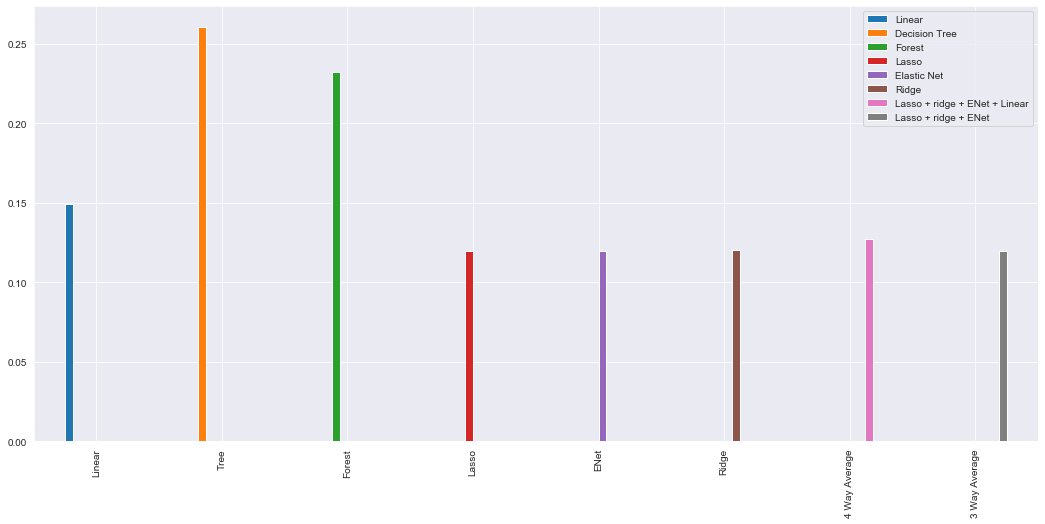

In [318]:
pd.DataFrame(Kaggle_scores).plot(kind='bar', figsize = (18, 8))
plt.show()

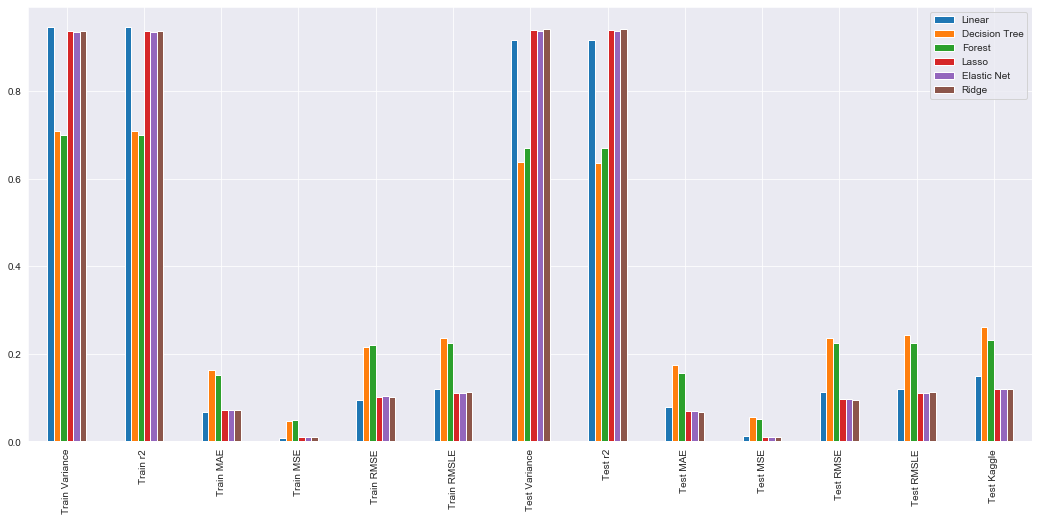

In [319]:
Final_Table.plot(kind='bar', figsize = (18, 8))
plt.show()

# Conclusion

An initial run of the linear model produced poor prediction results, with a kaggle score of 0.14935.

Based on these results, we then attempted parameter testing for the decision tree, which suggested that we use a value of 0.1 for min_samples_split, 0.1 for min_samples_leaf, include 117 max_features, and a max_depth of 5. This resulted in an rmsle score of 0.2320 and a kaggle score of 0.26043.

The random Forest showed similar performance using 100 estimators, a value of 0.1 for both min_samples_split and min_samples_leaf, 50 max_features, and a max_depth of 18.0. The prediction score for these settings was 0.2238 and the kaggles score was 0.23237.

Lasso showed better performance, producing a train prediction score pf 0.1110 and a kaggle score of 0.11976 using an alpha score of 0.0004.

Similarly, the Ridge model resulted in a train prediction score of 0.1139 and a kaggle score of 0.12031 using an alpha value of 10.

Lastly, the ElasticNet model resulted in a scores of 0.1112 and 0.11955 using an alpha value of 0.001.

On this basis we decided to average the scores of the Lasso, Ridge and ElasticNet models for a final kaggle score of 0.11936. 